Here we'll first be loading the FC matrices and explore their structure

In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset_MDD
import networkx as nx

In [2]:
dataset = read_dataset_MDD()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1294], edge_attr=[1294, 1], y=[1])
['edge_index', 'edge_attr', 'y', 'x']
ValuesView({'x': tensor([[ 0.0000,  0.2857,  0.0804,  ...,  0.2032,  0.1674,  0.0906],
        [ 0.2857,  0.0000, -0.3860,  ...,  0.1637, -0.0359,  0.1674],
        [ 0.0804, -0.3860,  0.0000,  ..., -0.0175, -0.0309,  0.0296],
        ...,
        [ 0.2032,  0.1637, -0.0175,  ...,  0.0000,  0.2329, -0.1452],
        [ 0.1674, -0.0359, -0.0309,  ...,  0.2329,  0.0000,  0.0183],
        [ 0.0906,  0.1674,  0.0296,  ..., -0.1452,  0.0183,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 113, 113, 114],
        [ 10,  12,  14,  ..., 111, 112, 108]]), 'edge_attr': tensor([[0.7785],
        [0.6966],
        [0.5463],
        ...,
        [0.6415],
        [0.4745],
        [0.5401]]), 'y': tensor([0])})


1604

In [4]:
#set the seed
import torch
torch.manual_seed(0)

MODEL = "GAT"
DATASET = "FC_MDD"

from models.models_FC import GAT_framework as framework # import the model

gnn = framework(dataset)

print(gnn.model)
print(gnn.train_idx)

Net(
  (conv_layers): ModuleList(
    (0): GATConv(116, 128, heads=4)
    (1): GATConv(512, 128, heads=4)
    (2): GATConv(512, 128, heads=4)
    (3): GATConv(512, 128, heads=4)
    (4): GATConv(512, 128, heads=4)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm(512)
    (1): BatchNorm(512)
    (2): BatchNorm(512)
    (3): BatchNorm(512)
    (4): BatchNorm(512)
  )
  (lin1): Linear(512, 128, bias=True)
  (lin2): Linear(128, 2, bias=True)
  (bn1): BatchNorm(128)
  (bn2): BatchNorm(2)
)
tensor([1365,  984, 1017,  ...,  260,  678,   83])


/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
gnn.iterate()

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 005, Loss: 0.158, Test Loss: 1.039, Train Acc: 0.485 Test Acc: 0.481
Epoch: 010, Loss: 0.123, Test Loss: 0.646, Train Acc: 1.000 Test Acc: 0.642
Epoch: 015, Loss: 0.115, Test Loss: 0.664, Train Acc: 1.000 Test Acc: 0.642
Epoch: 020, Loss: 0.107, Test Loss: 0.660, Train Acc: 1.000 Test Acc: 0.630
Epoch: 025, Loss: 0.101, Test Loss: 0.664, Train Acc: 1.000 Test Acc: 0.605
Epoch: 030, Loss: 0.097, Test Loss: 0.650, Train Acc: 1.000 Test Acc: 0.630
Epoch: 035, Loss: 0.093, Test Loss: 0.664, Train Acc: 1.000 Test Acc: 0.580
Epoch: 040, Loss: 0.088, Test Loss: 0.668, Train Acc: 1.000 Test Acc: 0.605
Epoch: 045, Loss: 0.084, Test Loss: 0.670, Train Acc: 1.000 Test Acc: 0.605
Epoch: 050, Loss: 0.080, Test Loss: 0.666, Train Acc: 1.000 Test Acc: 0.580
Epoch: 055, Loss: 0.076, Test Loss: 0.658, Train Acc: 1.000 Test Acc: 0.617
Epoch: 060, Loss: 0.073, Test Loss: 0.661, Train Acc: 1.000 Test Acc: 0.593
Epoch: 065, Loss: 0.070, Test Loss: 0.647, Train Acc: 1.000 Test Acc: 0.654
Epoch: 070, 

In [6]:
#gnn.train()

In [7]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

Model saved in: models/FC_MDD_GATserver.pt


In [6]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server.pt")

In [8]:
gnn.evaluate()

Test Loss: 0.635, Train Acc: 1.000 Test Acc: 0.667


In [9]:
train_features, test_features = gnn.evaluate_with_features2()

In [10]:
print(len(train_features[0]))
len(train_features), len(test_features)

8


(1523, 81)

In [11]:
import pickle as pkl
import networkx as nx

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def calculate_small_world(G):
    if nx.is_connected(G):
        return nx.algorithms.smallworld.sigma(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the small world coefficient of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.algorithms.smallworld.sigma(largest_component)
    
def compute_swi(graph):
    # Calculate clustering coefficient and average path length for the given graph
    clustering_coeff = nx.average_clustering(graph)
    avg_path_len = calculate_avg_path_length(graph)
    
    # Generate a random graph with the same number of nodes and edges
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    random_graph = nx.gnm_random_graph(num_nodes, num_edges)
    
    # Generate a lattice graph with the same number of nodes and edges
    lattice_graph = nx.watts_strogatz_graph(num_nodes, k=4, p=0)  # Adjust k as needed
    
    # Calculate clustering coefficient and average path length for the random graph
    random_clustering_coeff = nx.average_clustering(random_graph)
    random_avg_path_len = calculate_avg_path_length(random_graph)
    
    # Calculate clustering coefficient and average path length for the lattice graph
    lattice_clustering_coeff = nx.average_clustering(lattice_graph)
    lattice_avg_path_len = calculate_avg_path_length(lattice_graph)
    
    # Compute the Small-World Index (SWI)
    swi = ((avg_path_len - lattice_avg_path_len) / (random_avg_path_len - lattice_avg_path_len)) * \
          ((clustering_coeff - random_clustering_coeff) / (lattice_clustering_coeff - random_clustering_coeff))
    
    return swi
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        assortativity = nx.degree_assortativity_coefficient(G)
        small_world = compute_swi(G)
            
        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component, assortativity, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

# Save the properties to files
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "wb") as f:
    pkl.dump(train_properties, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "wb") as f:
    pkl.dump(test_properties, f)

In [12]:
print(len(train_properties))
train_properties[0:5]



1523


[(116,
  488,
  0.07316341829085457,
  3.314842578710645,
  148,
  938.0,
  6.439699892510922,
  116),
 (114,
  598,
  0.0928427262847384,
  3.166744294364229,
  164,
  1378.0,
  7.519630514954544,
  114),
 (114,
  408,
  0.06334420121099209,
  3.391864617295451,
  135,
  511.0,
  5.279502013122494,
  114),
 (115,
  744,
  0.11350114416475973,
  2.796796338672769,
  198,
  1870.0,
  7.980704583203741,
  115),
 (112,
  706,
  0.11357786357786358,
  3.3745173745173744,
  181,
  2528.0,
  9.050100863174576,
  112)]

In [13]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_with_sm.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_with_sm.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [14]:
"""
The embeddings of GCN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score

#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

Epoch [1000/800000], Property: num_nodes, Loss: 8624.2012
Epoch [2000/800000], Property: num_nodes, Loss: 5942.1797
Epoch [3000/800000], Property: num_nodes, Loss: 4214.9302
Epoch [4000/800000], Property: num_nodes, Loss: 3075.3374
Epoch [5000/800000], Property: num_nodes, Loss: 2299.4534
Epoch [6000/800000], Property: num_nodes, Loss: 1759.1758
Epoch [7000/800000], Property: num_nodes, Loss: 1380.2865
Epoch [8000/800000], Property: num_nodes, Loss: 1111.2935
Epoch [9000/800000], Property: num_nodes, Loss: 915.1191
Epoch [10000/800000], Property: num_nodes, Loss: 767.9552
Epoch [11000/800000], Property: num_nodes, Loss: 655.2929
Epoch [12000/800000], Property: num_nodes, Loss: 567.0733
Epoch [13000/800000], Property: num_nodes, Loss: 496.3718
Epoch [14000/800000], Property: num_nodes, Loss: 439.2293
Epoch [15000/800000], Property: num_nodes, Loss: 393.2050
Epoch [16000/800000], Property: num_nodes, Loss: 356.0715
Epoch [17000/800000], Property: num_nodes, Loss: 325.8481
Epoch [18000/80

Epoch [11000/800000], Property: num_edges, Loss: 111468.9219
Epoch [12000/800000], Property: num_edges, Loss: 103131.8359
Epoch [13000/800000], Property: num_edges, Loss: 95575.0000
Epoch [14000/800000], Property: num_edges, Loss: 88720.9766
Epoch [15000/800000], Property: num_edges, Loss: 82493.2656
Epoch [16000/800000], Property: num_edges, Loss: 76831.8672
Epoch [17000/800000], Property: num_edges, Loss: 71687.8047
Epoch [18000/800000], Property: num_edges, Loss: 67023.4609
Epoch [19000/800000], Property: num_edges, Loss: 62805.1055
Epoch [20000/800000], Property: num_edges, Loss: 58999.4219
Epoch [21000/800000], Property: num_edges, Loss: 55567.4531
Epoch [22000/800000], Property: num_edges, Loss: 52464.3086
Epoch [23000/800000], Property: num_edges, Loss: 49645.8047
Epoch [24000/800000], Property: num_edges, Loss: 47074.6094
Epoch [25000/800000], Property: num_edges, Loss: 44724.6836
Epoch [26000/800000], Property: num_edges, Loss: 42581.1719
Epoch [27000/800000], Property: num_ed

Epoch [147000/800000], Property: num_edges, Loss: 12501.8018
Epoch [148000/800000], Property: num_edges, Loss: 12482.1514
Epoch [149000/800000], Property: num_edges, Loss: 12462.6240
Epoch [150000/800000], Property: num_edges, Loss: 12443.2178
Epoch [151000/800000], Property: num_edges, Loss: 12423.9277
Epoch [152000/800000], Property: num_edges, Loss: 12404.7607
Epoch [153000/800000], Property: num_edges, Loss: 12385.7129
Epoch [154000/800000], Property: num_edges, Loss: 12366.7803
Epoch [155000/800000], Property: num_edges, Loss: 12347.9648
Epoch [156000/800000], Property: num_edges, Loss: 12329.2637
Epoch [157000/800000], Property: num_edges, Loss: 12310.6777
Epoch [158000/800000], Property: num_edges, Loss: 12292.2109
Epoch [159000/800000], Property: num_edges, Loss: 12273.8584
Epoch [160000/800000], Property: num_edges, Loss: 12255.6191
Epoch [161000/800000], Property: num_edges, Loss: 12237.4980
Epoch [162000/800000], Property: num_edges, Loss: 12219.4863
Epoch [163000/800000], P

Epoch [282000/800000], Property: num_edges, Loss: 10455.6133
Epoch [283000/800000], Property: num_edges, Loss: 10443.5840
Epoch [284000/800000], Property: num_edges, Loss: 10431.6045
Epoch [285000/800000], Property: num_edges, Loss: 10419.6699
Epoch [286000/800000], Property: num_edges, Loss: 10407.7842
Epoch [287000/800000], Property: num_edges, Loss: 10395.9434
Epoch [288000/800000], Property: num_edges, Loss: 10384.1514
Epoch [289000/800000], Property: num_edges, Loss: 10372.4072
Epoch [290000/800000], Property: num_edges, Loss: 10360.7090
Epoch [291000/800000], Property: num_edges, Loss: 10349.0605
Epoch [292000/800000], Property: num_edges, Loss: 10337.4580
Epoch [293000/800000], Property: num_edges, Loss: 10325.9043
Epoch [294000/800000], Property: num_edges, Loss: 10314.3965
Epoch [295000/800000], Property: num_edges, Loss: 10302.9355
Epoch [296000/800000], Property: num_edges, Loss: 10291.5244
Epoch [297000/800000], Property: num_edges, Loss: 10280.1592
Epoch [298000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 9255.2520
Epoch [419000/800000], Property: num_edges, Loss: 9249.8291
Epoch [420000/800000], Property: num_edges, Loss: 9244.4619
Epoch [421000/800000], Property: num_edges, Loss: 9239.1387
Epoch [422000/800000], Property: num_edges, Loss: 9233.8574
Epoch [423000/800000], Property: num_edges, Loss: 9228.6230
Epoch [424000/800000], Property: num_edges, Loss: 9223.4316
Epoch [425000/800000], Property: num_edges, Loss: 9218.2871
Epoch [426000/800000], Property: num_edges, Loss: 9213.1865
Epoch [427000/800000], Property: num_edges, Loss: 9208.1279
Epoch [428000/800000], Property: num_edges, Loss: 9203.1172
Epoch [429000/800000], Property: num_edges, Loss: 9198.1494
Epoch [430000/800000], Property: num_edges, Loss: 9193.2266
Epoch [431000/800000], Property: num_edges, Loss: 9188.3477
Epoch [432000/800000], Property: num_edges, Loss: 9183.5137
Epoch [433000/800000], Property: num_edges, Loss: 9178.7246
Epoch [434000/800000], Property: num_edg

Epoch [3000/800000], Property: density, Loss: 0.0002
Epoch [4000/800000], Property: density, Loss: 0.0002
Epoch [5000/800000], Property: density, Loss: 0.0002
Early stopping at epoch 5284
Embedding: torch.Size([1523, 512])
Property: density
  Train MSE: 0.0002, Test MSE: 0.0013
  Train R²: 0.3526, Test R²: -2.1984
Epoch [1000/800000], Property: avg_path_len, Loss: 0.4520
Epoch [2000/800000], Property: avg_path_len, Loss: 0.3023
Epoch [3000/800000], Property: avg_path_len, Loss: 0.2439
Epoch [4000/800000], Property: avg_path_len, Loss: 0.2027
Epoch [5000/800000], Property: avg_path_len, Loss: 0.1662
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1343
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1107
Epoch [8000/800000], Property: avg_path_len, Loss: 0.0976
Epoch [9000/800000], Property: avg_path_len, Loss: 0.0927
Epoch [10000/800000], Property: avg_path_len, Loss: 0.0917
Epoch [11000/800000], Property: avg_path_len, Loss: 0.0915
Epoch [12000/800000], Property: avg_path_len

Epoch [115000/800000], Property: num_cliques, Loss: 491.9959
Epoch [116000/800000], Property: num_cliques, Loss: 489.6333
Epoch [117000/800000], Property: num_cliques, Loss: 487.3161
Epoch [118000/800000], Property: num_cliques, Loss: 485.0533
Epoch [119000/800000], Property: num_cliques, Loss: 482.8436
Epoch [120000/800000], Property: num_cliques, Loss: 480.6783
Epoch [121000/800000], Property: num_cliques, Loss: 478.5579
Epoch [122000/800000], Property: num_cliques, Loss: 476.4819
Epoch [123000/800000], Property: num_cliques, Loss: 474.4505
Epoch [124000/800000], Property: num_cliques, Loss: 472.4637
Epoch [125000/800000], Property: num_cliques, Loss: 470.5216
Epoch [126000/800000], Property: num_cliques, Loss: 468.6239
Epoch [127000/800000], Property: num_cliques, Loss: 466.7709
Epoch [128000/800000], Property: num_cliques, Loss: 464.9625
Epoch [129000/800000], Property: num_cliques, Loss: 463.1987
Epoch [130000/800000], Property: num_cliques, Loss: 461.4794
Epoch [131000/800000], P

Epoch [67000/800000], Property: num_triangles, Loss: 374673.0312
Epoch [68000/800000], Property: num_triangles, Loss: 372156.3125
Epoch [69000/800000], Property: num_triangles, Loss: 369714.0625
Epoch [70000/800000], Property: num_triangles, Loss: 367343.1562
Epoch [71000/800000], Property: num_triangles, Loss: 365040.0625
Epoch [72000/800000], Property: num_triangles, Loss: 362801.4688
Epoch [73000/800000], Property: num_triangles, Loss: 360625.2500
Epoch [74000/800000], Property: num_triangles, Loss: 358509.1875
Epoch [75000/800000], Property: num_triangles, Loss: 356451.0000
Epoch [76000/800000], Property: num_triangles, Loss: 354448.6562
Epoch [77000/800000], Property: num_triangles, Loss: 352499.3125
Epoch [78000/800000], Property: num_triangles, Loss: 350600.2500
Epoch [79000/800000], Property: num_triangles, Loss: 348749.4688
Epoch [80000/800000], Property: num_triangles, Loss: 346944.5938
Epoch [81000/800000], Property: num_triangles, Loss: 345183.3438
Epoch [82000/800000], Pro

Epoch [192000/800000], Property: num_triangles, Loss: 264111.5312
Epoch [193000/800000], Property: num_triangles, Loss: 263819.6875
Epoch [194000/800000], Property: num_triangles, Loss: 263531.0312
Epoch [195000/800000], Property: num_triangles, Loss: 263245.5625
Epoch [196000/800000], Property: num_triangles, Loss: 262963.1562
Epoch [197000/800000], Property: num_triangles, Loss: 262683.7812
Epoch [198000/800000], Property: num_triangles, Loss: 262407.3438
Epoch [199000/800000], Property: num_triangles, Loss: 262133.8594
Epoch [200000/800000], Property: num_triangles, Loss: 261863.2656
Epoch [201000/800000], Property: num_triangles, Loss: 261595.5312
Epoch [202000/800000], Property: num_triangles, Loss: 261330.6562
Epoch [203000/800000], Property: num_triangles, Loss: 261068.5156
Epoch [204000/800000], Property: num_triangles, Loss: 260809.2656
Epoch [205000/800000], Property: num_triangles, Loss: 260552.7031
Epoch [206000/800000], Property: num_triangles, Loss: 260298.8594
Epoch [207

Epoch [317000/800000], Property: num_triangles, Loss: 243948.6250
Epoch [318000/800000], Property: num_triangles, Loss: 243870.3125
Epoch [319000/800000], Property: num_triangles, Loss: 243792.7656
Epoch [320000/800000], Property: num_triangles, Loss: 243715.8906
Epoch [321000/800000], Property: num_triangles, Loss: 243639.7188
Epoch [322000/800000], Property: num_triangles, Loss: 243564.3125
Epoch [323000/800000], Property: num_triangles, Loss: 243489.5625
Epoch [324000/800000], Property: num_triangles, Loss: 243415.5156
Epoch [325000/800000], Property: num_triangles, Loss: 243342.2031
Epoch [326000/800000], Property: num_triangles, Loss: 243269.5312
Epoch [327000/800000], Property: num_triangles, Loss: 243197.5625
Epoch [328000/800000], Property: num_triangles, Loss: 243126.2344
Epoch [329000/800000], Property: num_triangles, Loss: 243055.5625
Epoch [330000/800000], Property: num_triangles, Loss: 242985.5625
Epoch [331000/800000], Property: num_triangles, Loss: 242916.1875
Epoch [332

Epoch [442000/800000], Property: num_triangles, Loss: 237942.0625
Epoch [443000/800000], Property: num_triangles, Loss: 237910.4531
Epoch [444000/800000], Property: num_triangles, Loss: 237878.8750
Epoch [445000/800000], Property: num_triangles, Loss: 237847.4844
Epoch [446000/800000], Property: num_triangles, Loss: 237816.1250
Epoch [447000/800000], Property: num_triangles, Loss: 237784.8281
Epoch [448000/800000], Property: num_triangles, Loss: 237753.6719
Epoch [449000/800000], Property: num_triangles, Loss: 237722.5781
Epoch [450000/800000], Property: num_triangles, Loss: 237691.5938
Epoch [451000/800000], Property: num_triangles, Loss: 237660.6875
Epoch [452000/800000], Property: num_triangles, Loss: 237629.8750
Epoch [453000/800000], Property: num_triangles, Loss: 237599.1406
Epoch [454000/800000], Property: num_triangles, Loss: 237568.5469
Epoch [455000/800000], Property: num_triangles, Loss: 237538.0000
Epoch [456000/800000], Property: num_triangles, Loss: 237507.5781
Epoch [457

Epoch [567000/800000], Property: num_triangles, Loss: 234585.8594
Epoch [568000/800000], Property: num_triangles, Loss: 234562.6719
Epoch [569000/800000], Property: num_triangles, Loss: 234539.5156
Epoch [570000/800000], Property: num_triangles, Loss: 234516.4375
Epoch [571000/800000], Property: num_triangles, Loss: 234493.3906
Epoch [572000/800000], Property: num_triangles, Loss: 234470.3438
Epoch [573000/800000], Property: num_triangles, Loss: 234447.4688
Epoch [574000/800000], Property: num_triangles, Loss: 234424.5156
Epoch [575000/800000], Property: num_triangles, Loss: 234401.6562
Epoch [576000/800000], Property: num_triangles, Loss: 234378.8594
Epoch [577000/800000], Property: num_triangles, Loss: 234356.0312
Epoch [578000/800000], Property: num_triangles, Loss: 234333.3125
Epoch [579000/800000], Property: num_triangles, Loss: 234310.6562
Epoch [580000/800000], Property: num_triangles, Loss: 234287.9844
Epoch [581000/800000], Property: num_triangles, Loss: 234265.3750
Epoch [582

Epoch [692000/800000], Property: num_triangles, Loss: 232034.0000
Epoch [693000/800000], Property: num_triangles, Loss: 232016.3438
Epoch [694000/800000], Property: num_triangles, Loss: 231998.7812
Epoch [695000/800000], Property: num_triangles, Loss: 231981.2812
Epoch [696000/800000], Property: num_triangles, Loss: 231963.8125
Epoch [697000/800000], Property: num_triangles, Loss: 231946.3438
Epoch [698000/800000], Property: num_triangles, Loss: 231928.9688
Epoch [699000/800000], Property: num_triangles, Loss: 231911.6406
Epoch [700000/800000], Property: num_triangles, Loss: 231894.3594
Epoch [701000/800000], Property: num_triangles, Loss: 231877.1250
Epoch [702000/800000], Property: num_triangles, Loss: 231859.8906
Epoch [703000/800000], Property: num_triangles, Loss: 231842.7344
Epoch [704000/800000], Property: num_triangles, Loss: 231825.6250
Epoch [705000/800000], Property: num_triangles, Loss: 231808.5312
Epoch [706000/800000], Property: num_triangles, Loss: 231791.5312
Epoch [707

Epoch [16000/800000], Property: num_squares, Loss: 0.8962
Epoch [17000/800000], Property: num_squares, Loss: 0.8961
Epoch [18000/800000], Property: num_squares, Loss: 0.8961
Epoch [19000/800000], Property: num_squares, Loss: 0.8961
Epoch [20000/800000], Property: num_squares, Loss: 0.8961
Early stopping at epoch 20114
Embedding: torch.Size([1523, 512])
Property: num_squares
  Train MSE: 0.8961, Test MSE: 6.1046
  Train R²: 0.3625, Test R²: -3.3722
Epoch [1000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 8448.5361
Epoch [2000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5805.0728
Epoch [3000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4110.2324
Epoch [4000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2995.8438
Epoch [5000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2238.9832
Epoch [6000/800000], Pr

Epoch [75000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 51.9521
Epoch [76000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 49.9957
Epoch [77000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 48.0839
Epoch [78000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 46.2167
Epoch [79000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 44.3941
Epoch [80000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 42.6161
Epoch [81000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 40.8826
Epoch [82000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 39.1938
Epoch [83000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 37.5495
Epoch [84000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [41000/800000], Property: num_nodes, Loss: 68.0106
Epoch [42000/800000], Property: num_nodes, Loss: 66.3728
Epoch [43000/800000], Property: num_nodes, Loss: 64.7561
Epoch [44000/800000], Property: num_nodes, Loss: 63.1605
Epoch [45000/800000], Property: num_nodes, Loss: 61.5859
Epoch [46000/800000], Property: num_nodes, Loss: 60.0325
Epoch [47000/800000], Property: num_nodes, Loss: 58.5001
Epoch [48000/800000], Property: num_nodes, Loss: 56.9887
Epoch [49000/800000], Property: num_nodes, Loss: 55.5026
Epoch [50000/800000], Property: num_nodes, Loss: 54.0390
Epoch [51000/800000], Property: num_nodes, Loss: 52.5963
Epoch [52000/800000], Property: num_nodes, Loss: 51.1744
Epoch [53000/800000], Property: num_nodes, Loss: 49.7736
Epoch [54000/800000], Property: num_nodes, Loss: 48.3935
Epoch [55000/800000], Property: num_nodes, Loss: 47.0344
Epoch [56000/800000], Property: num_nodes, Loss: 45.6962
Epoch [57000/800000], Property: num_nodes, Loss: 44.3789
Epoch [58000/800000], Property:

Epoch [51000/800000], Property: num_edges, Loss: 13744.6094
Epoch [52000/800000], Property: num_edges, Loss: 13582.6016
Epoch [53000/800000], Property: num_edges, Loss: 13430.0791
Epoch [54000/800000], Property: num_edges, Loss: 13286.2852
Epoch [55000/800000], Property: num_edges, Loss: 13150.5869
Epoch [56000/800000], Property: num_edges, Loss: 13022.5029
Epoch [57000/800000], Property: num_edges, Loss: 12901.6104
Epoch [58000/800000], Property: num_edges, Loss: 12787.5244
Epoch [59000/800000], Property: num_edges, Loss: 12679.8408
Epoch [60000/800000], Property: num_edges, Loss: 12578.1562
Epoch [61000/800000], Property: num_edges, Loss: 12481.9531
Epoch [62000/800000], Property: num_edges, Loss: 12390.6387
Epoch [63000/800000], Property: num_edges, Loss: 12303.6582
Epoch [64000/800000], Property: num_edges, Loss: 12220.7383
Epoch [65000/800000], Property: num_edges, Loss: 12141.5762
Epoch [66000/800000], Property: num_edges, Loss: 12065.8408
Epoch [67000/800000], Property: num_edge

Epoch [187000/800000], Property: num_edges, Loss: 9967.1475
Epoch [188000/800000], Property: num_edges, Loss: 9960.7471
Epoch [189000/800000], Property: num_edges, Loss: 9954.3662
Epoch [190000/800000], Property: num_edges, Loss: 9948.0068
Epoch [191000/800000], Property: num_edges, Loss: 9941.6689
Epoch [192000/800000], Property: num_edges, Loss: 9935.3525
Epoch [193000/800000], Property: num_edges, Loss: 9929.0566
Epoch [194000/800000], Property: num_edges, Loss: 9922.7822
Epoch [195000/800000], Property: num_edges, Loss: 9916.5303
Epoch [196000/800000], Property: num_edges, Loss: 9910.2969
Epoch [197000/800000], Property: num_edges, Loss: 9904.0869
Epoch [198000/800000], Property: num_edges, Loss: 9897.8965
Epoch [199000/800000], Property: num_edges, Loss: 9891.7295
Epoch [200000/800000], Property: num_edges, Loss: 9885.5820
Epoch [201000/800000], Property: num_edges, Loss: 9879.4561
Epoch [202000/800000], Property: num_edges, Loss: 9873.3516
Epoch [203000/800000], Property: num_edg

Epoch [324000/800000], Property: num_edges, Loss: 9284.5645
Epoch [325000/800000], Property: num_edges, Loss: 9281.0381
Epoch [326000/800000], Property: num_edges, Loss: 9277.5332
Epoch [327000/800000], Property: num_edges, Loss: 9274.0527
Epoch [328000/800000], Property: num_edges, Loss: 9270.5918
Epoch [329000/800000], Property: num_edges, Loss: 9267.1514
Epoch [330000/800000], Property: num_edges, Loss: 9263.7354
Epoch [331000/800000], Property: num_edges, Loss: 9260.3418
Epoch [332000/800000], Property: num_edges, Loss: 9256.9678
Epoch [333000/800000], Property: num_edges, Loss: 9253.6162
Epoch [334000/800000], Property: num_edges, Loss: 9250.2871
Epoch [335000/800000], Property: num_edges, Loss: 9246.9814
Epoch [336000/800000], Property: num_edges, Loss: 9243.6953
Epoch [337000/800000], Property: num_edges, Loss: 9240.4316
Epoch [338000/800000], Property: num_edges, Loss: 9237.1895
Epoch [339000/800000], Property: num_edges, Loss: 9233.9697
Epoch [340000/800000], Property: num_edg

Epoch [461000/800000], Property: num_edges, Loss: 9007.0303
Epoch [462000/800000], Property: num_edges, Loss: 9006.4580
Epoch [463000/800000], Property: num_edges, Loss: 9005.9053
Epoch [464000/800000], Property: num_edges, Loss: 9005.3740
Epoch [465000/800000], Property: num_edges, Loss: 9004.8779
Epoch [466000/800000], Property: num_edges, Loss: 9004.3994
Epoch [467000/800000], Property: num_edges, Loss: 9003.9434
Epoch [468000/800000], Property: num_edges, Loss: 9003.5059
Epoch [469000/800000], Property: num_edges, Loss: 9003.0879
Epoch [470000/800000], Property: num_edges, Loss: 9002.6904
Epoch [471000/800000], Property: num_edges, Loss: 9002.3096
Epoch [472000/800000], Property: num_edges, Loss: 9001.9492
Epoch [473000/800000], Property: num_edges, Loss: 9001.6094
Epoch [474000/800000], Property: num_edges, Loss: 9001.2871
Epoch [475000/800000], Property: num_edges, Loss: 9000.9863
Epoch [476000/800000], Property: num_edges, Loss: 9000.7012
Epoch [477000/800000], Property: num_edg

Epoch [73000/800000], Property: num_cliques, Loss: 519.0113
Epoch [74000/800000], Property: num_cliques, Loss: 517.0567
Epoch [75000/800000], Property: num_cliques, Loss: 515.1235
Epoch [76000/800000], Property: num_cliques, Loss: 513.2116
Epoch [77000/800000], Property: num_cliques, Loss: 511.3208
Epoch [78000/800000], Property: num_cliques, Loss: 509.4512
Epoch [79000/800000], Property: num_cliques, Loss: 507.6029
Epoch [80000/800000], Property: num_cliques, Loss: 505.7760
Epoch [81000/800000], Property: num_cliques, Loss: 503.9701
Epoch [82000/800000], Property: num_cliques, Loss: 502.1855
Epoch [83000/800000], Property: num_cliques, Loss: 500.4221
Epoch [84000/800000], Property: num_cliques, Loss: 498.6897
Epoch [85000/800000], Property: num_cliques, Loss: 496.9818
Epoch [86000/800000], Property: num_cliques, Loss: 495.2950
Epoch [87000/800000], Property: num_cliques, Loss: 493.6288
Epoch [88000/800000], Property: num_cliques, Loss: 491.9837
Epoch [89000/800000], Property: num_cliq

Epoch [29000/800000], Property: num_triangles, Loss: 499040.1562
Epoch [30000/800000], Property: num_triangles, Loss: 488698.7188
Epoch [31000/800000], Property: num_triangles, Loss: 478989.6875
Epoch [32000/800000], Property: num_triangles, Loss: 469849.0312
Epoch [33000/800000], Property: num_triangles, Loss: 461227.1875
Epoch [34000/800000], Property: num_triangles, Loss: 453091.3125
Epoch [35000/800000], Property: num_triangles, Loss: 445407.1250
Epoch [36000/800000], Property: num_triangles, Loss: 438136.8438
Epoch [37000/800000], Property: num_triangles, Loss: 431251.0000
Epoch [38000/800000], Property: num_triangles, Loss: 424728.1250
Epoch [39000/800000], Property: num_triangles, Loss: 418545.4062
Epoch [40000/800000], Property: num_triangles, Loss: 412681.0000
Epoch [41000/800000], Property: num_triangles, Loss: 407117.0625
Epoch [42000/800000], Property: num_triangles, Loss: 401835.7812
Epoch [43000/800000], Property: num_triangles, Loss: 396816.9375
Epoch [44000/800000], Pro

Epoch [155000/800000], Property: num_triangles, Loss: 260148.4375
Epoch [156000/800000], Property: num_triangles, Loss: 259822.5781
Epoch [157000/800000], Property: num_triangles, Loss: 259500.9375
Epoch [158000/800000], Property: num_triangles, Loss: 259183.2969
Epoch [159000/800000], Property: num_triangles, Loss: 258869.6250
Epoch [160000/800000], Property: num_triangles, Loss: 258559.8281
Epoch [161000/800000], Property: num_triangles, Loss: 258254.0625
Epoch [162000/800000], Property: num_triangles, Loss: 257952.0781
Epoch [163000/800000], Property: num_triangles, Loss: 257653.8594
Epoch [164000/800000], Property: num_triangles, Loss: 257359.4219
Epoch [165000/800000], Property: num_triangles, Loss: 257068.7188
Epoch [166000/800000], Property: num_triangles, Loss: 256781.6562
Epoch [167000/800000], Property: num_triangles, Loss: 256498.1250
Epoch [168000/800000], Property: num_triangles, Loss: 256218.1406
Epoch [169000/800000], Property: num_triangles, Loss: 255941.6562
Epoch [170

Epoch [280000/800000], Property: num_triangles, Loss: 239555.7812
Epoch [281000/800000], Property: num_triangles, Loss: 239486.8438
Epoch [282000/800000], Property: num_triangles, Loss: 239418.6406
Epoch [283000/800000], Property: num_triangles, Loss: 239351.1094
Epoch [284000/800000], Property: num_triangles, Loss: 239284.3125
Epoch [285000/800000], Property: num_triangles, Loss: 239218.1562
Epoch [286000/800000], Property: num_triangles, Loss: 239152.6562
Epoch [287000/800000], Property: num_triangles, Loss: 239087.7969
Epoch [288000/800000], Property: num_triangles, Loss: 239023.6250
Epoch [289000/800000], Property: num_triangles, Loss: 238960.1719
Epoch [290000/800000], Property: num_triangles, Loss: 238897.3281
Epoch [291000/800000], Property: num_triangles, Loss: 238835.1562
Epoch [292000/800000], Property: num_triangles, Loss: 238773.6250
Epoch [293000/800000], Property: num_triangles, Loss: 238712.7031
Epoch [294000/800000], Property: num_triangles, Loss: 238652.4531
Epoch [295

Epoch [405000/800000], Property: num_triangles, Loss: 234784.4844
Epoch [406000/800000], Property: num_triangles, Loss: 234765.0938
Epoch [407000/800000], Property: num_triangles, Loss: 234745.8594
Epoch [408000/800000], Property: num_triangles, Loss: 234726.7656
Epoch [409000/800000], Property: num_triangles, Loss: 234707.8281
Epoch [410000/800000], Property: num_triangles, Loss: 234688.9844
Epoch [411000/800000], Property: num_triangles, Loss: 234670.3125
Epoch [412000/800000], Property: num_triangles, Loss: 234651.7812
Epoch [413000/800000], Property: num_triangles, Loss: 234633.3438
Epoch [414000/800000], Property: num_triangles, Loss: 234615.0469
Epoch [415000/800000], Property: num_triangles, Loss: 234596.9219
Epoch [416000/800000], Property: num_triangles, Loss: 234578.9062
Epoch [417000/800000], Property: num_triangles, Loss: 234561.0312
Epoch [418000/800000], Property: num_triangles, Loss: 234543.2500
Epoch [419000/800000], Property: num_triangles, Loss: 234525.6094
Epoch [420

Epoch [530000/800000], Property: num_triangles, Loss: 233130.8281
Epoch [531000/800000], Property: num_triangles, Loss: 233122.3906
Epoch [532000/800000], Property: num_triangles, Loss: 233114.0312
Epoch [533000/800000], Property: num_triangles, Loss: 233105.6562
Epoch [534000/800000], Property: num_triangles, Loss: 233097.3750
Epoch [535000/800000], Property: num_triangles, Loss: 233089.1719
Epoch [536000/800000], Property: num_triangles, Loss: 233081.0469
Epoch [537000/800000], Property: num_triangles, Loss: 233072.9844
Epoch [538000/800000], Property: num_triangles, Loss: 233064.8906
Epoch [539000/800000], Property: num_triangles, Loss: 233056.9062
Epoch [540000/800000], Property: num_triangles, Loss: 233048.9375
Epoch [541000/800000], Property: num_triangles, Loss: 233041.0625
Epoch [542000/800000], Property: num_triangles, Loss: 233033.2188
Epoch [543000/800000], Property: num_triangles, Loss: 233025.4688
Epoch [544000/800000], Property: num_triangles, Loss: 233017.7656
Epoch [545

Epoch [655000/800000], Property: num_triangles, Loss: 232359.5000
Epoch [656000/800000], Property: num_triangles, Loss: 232354.7969
Epoch [657000/800000], Property: num_triangles, Loss: 232350.1250
Epoch [658000/800000], Property: num_triangles, Loss: 232345.5000
Epoch [659000/800000], Property: num_triangles, Loss: 232340.8281
Epoch [660000/800000], Property: num_triangles, Loss: 232336.2188
Epoch [661000/800000], Property: num_triangles, Loss: 232331.6250
Epoch [662000/800000], Property: num_triangles, Loss: 232327.0625
Epoch [663000/800000], Property: num_triangles, Loss: 232322.4531
Epoch [664000/800000], Property: num_triangles, Loss: 232317.9375
Epoch [665000/800000], Property: num_triangles, Loss: 232313.4062
Epoch [666000/800000], Property: num_triangles, Loss: 232308.9062
Epoch [667000/800000], Property: num_triangles, Loss: 232304.4375
Epoch [668000/800000], Property: num_triangles, Loss: 232299.9688
Epoch [669000/800000], Property: num_triangles, Loss: 232295.5625
Epoch [670

Epoch [780000/800000], Property: num_triangles, Loss: 231931.2031
Epoch [781000/800000], Property: num_triangles, Loss: 231929.0938
Epoch [782000/800000], Property: num_triangles, Loss: 231926.9688
Epoch [783000/800000], Property: num_triangles, Loss: 231924.8594
Epoch [784000/800000], Property: num_triangles, Loss: 231922.8281
Epoch [785000/800000], Property: num_triangles, Loss: 231920.7656
Epoch [786000/800000], Property: num_triangles, Loss: 231918.7656
Epoch [787000/800000], Property: num_triangles, Loss: 231916.7500
Epoch [788000/800000], Property: num_triangles, Loss: 231914.7344
Epoch [789000/800000], Property: num_triangles, Loss: 231912.7656
Epoch [790000/800000], Property: num_triangles, Loss: 231910.8281
Epoch [791000/800000], Property: num_triangles, Loss: 231908.9375
Epoch [792000/800000], Property: num_triangles, Loss: 231907.0000
Epoch [793000/800000], Property: num_triangles, Loss: 231905.1562
Epoch [794000/800000], Property: num_triangles, Loss: 231903.2656
Epoch [795

Epoch [53000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 52.6166
Epoch [54000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 51.2568
Epoch [55000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 49.9179
Epoch [56000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 48.5999
Epoch [57000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 47.3028
Epoch [58000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 46.0267
Epoch [59000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 44.7714
Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 43.5370
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 42.3236
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [3000/800000], Property: num_nodes, Loss: 2478.9680
Epoch [4000/800000], Property: num_nodes, Loss: 1571.5271
Epoch [5000/800000], Property: num_nodes, Loss: 1055.3225
Epoch [6000/800000], Property: num_nodes, Loss: 737.3547
Epoch [7000/800000], Property: num_nodes, Loss: 529.7757
Epoch [8000/800000], Property: num_nodes, Loss: 391.3700
Epoch [9000/800000], Property: num_nodes, Loss: 297.8154
Epoch [10000/800000], Property: num_nodes, Loss: 233.8230
Epoch [11000/800000], Property: num_nodes, Loss: 189.3449
Epoch [12000/800000], Property: num_nodes, Loss: 157.4005
Epoch [13000/800000], Property: num_nodes, Loss: 133.5867
Epoch [14000/800000], Property: num_nodes, Loss: 115.4164
Epoch [15000/800000], Property: num_nodes, Loss: 101.4626
Epoch [16000/800000], Property: num_nodes, Loss: 90.7192
Epoch [17000/800000], Property: num_nodes, Loss: 82.3790
Epoch [18000/800000], Property: num_nodes, Loss: 75.8082
Epoch [19000/800000], Property: num_nodes, Loss: 70.5771
Epoch [20000/800000], 

Epoch [13000/800000], Property: num_edges, Loss: 57410.4180
Epoch [14000/800000], Property: num_edges, Loss: 51765.6680
Epoch [15000/800000], Property: num_edges, Loss: 46947.9062
Epoch [16000/800000], Property: num_edges, Loss: 42809.9180
Epoch [17000/800000], Property: num_edges, Loss: 39233.3672
Epoch [18000/800000], Property: num_edges, Loss: 36125.4531
Epoch [19000/800000], Property: num_edges, Loss: 33407.2461
Epoch [20000/800000], Property: num_edges, Loss: 31018.6152
Epoch [21000/800000], Property: num_edges, Loss: 28912.7773
Epoch [22000/800000], Property: num_edges, Loss: 27051.4062
Epoch [23000/800000], Property: num_edges, Loss: 25402.5293
Epoch [24000/800000], Property: num_edges, Loss: 23937.1953
Epoch [25000/800000], Property: num_edges, Loss: 22632.2363
Epoch [26000/800000], Property: num_edges, Loss: 21470.3555
Epoch [27000/800000], Property: num_edges, Loss: 20435.0137
Epoch [28000/800000], Property: num_edges, Loss: 19512.0664
Epoch [29000/800000], Property: num_edge

Epoch [150000/800000], Property: num_edges, Loss: 9694.8643
Epoch [151000/800000], Property: num_edges, Loss: 9690.6602
Epoch [152000/800000], Property: num_edges, Loss: 9686.4951
Epoch [153000/800000], Property: num_edges, Loss: 9682.3594
Epoch [154000/800000], Property: num_edges, Loss: 9678.2490
Epoch [155000/800000], Property: num_edges, Loss: 9674.1553
Epoch [156000/800000], Property: num_edges, Loss: 9670.0811
Epoch [157000/800000], Property: num_edges, Loss: 9666.0215
Epoch [158000/800000], Property: num_edges, Loss: 9661.9688
Epoch [159000/800000], Property: num_edges, Loss: 9657.9307
Epoch [160000/800000], Property: num_edges, Loss: 9653.9014
Epoch [161000/800000], Property: num_edges, Loss: 9649.8848
Epoch [162000/800000], Property: num_edges, Loss: 9645.8799
Epoch [163000/800000], Property: num_edges, Loss: 9641.8848
Epoch [164000/800000], Property: num_edges, Loss: 9637.9014
Epoch [165000/800000], Property: num_edges, Loss: 9633.9307
Epoch [166000/800000], Property: num_edg

Epoch [287000/800000], Property: num_edges, Loss: 9232.8398
Epoch [288000/800000], Property: num_edges, Loss: 9230.2158
Epoch [289000/800000], Property: num_edges, Loss: 9227.6025
Epoch [290000/800000], Property: num_edges, Loss: 9225.0039
Epoch [291000/800000], Property: num_edges, Loss: 9222.4160
Epoch [292000/800000], Property: num_edges, Loss: 9219.8398
Epoch [293000/800000], Property: num_edges, Loss: 9217.2764
Epoch [294000/800000], Property: num_edges, Loss: 9214.7207
Epoch [295000/800000], Property: num_edges, Loss: 9212.1797
Epoch [296000/800000], Property: num_edges, Loss: 9209.6504
Epoch [297000/800000], Property: num_edges, Loss: 9207.1309
Epoch [298000/800000], Property: num_edges, Loss: 9204.6240
Epoch [299000/800000], Property: num_edges, Loss: 9202.1279
Epoch [300000/800000], Property: num_edges, Loss: 9199.6455
Epoch [301000/800000], Property: num_edges, Loss: 9197.1738
Epoch [302000/800000], Property: num_edges, Loss: 9194.7148
Epoch [303000/800000], Property: num_edg

Epoch [424000/800000], Property: num_edges, Loss: 8982.5518
Epoch [425000/800000], Property: num_edges, Loss: 8981.5391
Epoch [426000/800000], Property: num_edges, Loss: 8980.5381
Epoch [427000/800000], Property: num_edges, Loss: 8979.5469
Epoch [428000/800000], Property: num_edges, Loss: 8978.5684
Epoch [429000/800000], Property: num_edges, Loss: 8977.5986
Epoch [430000/800000], Property: num_edges, Loss: 8976.6426
Epoch [431000/800000], Property: num_edges, Loss: 8975.6943
Epoch [432000/800000], Property: num_edges, Loss: 8974.7578
Epoch [433000/800000], Property: num_edges, Loss: 8973.8330
Epoch [434000/800000], Property: num_edges, Loss: 8972.9189
Epoch [435000/800000], Property: num_edges, Loss: 8972.0166
Epoch [436000/800000], Property: num_edges, Loss: 8971.1250
Epoch [437000/800000], Property: num_edges, Loss: 8970.2422
Epoch [438000/800000], Property: num_edges, Loss: 8969.3711
Epoch [439000/800000], Property: num_edges, Loss: 8968.5127
Epoch [440000/800000], Property: num_edg

Epoch [10000/800000], Property: num_cliques, Loss: 1398.1316
Epoch [11000/800000], Property: num_cliques, Loss: 1204.7661
Epoch [12000/800000], Property: num_cliques, Loss: 1059.0997
Epoch [13000/800000], Property: num_cliques, Loss: 949.3495
Epoch [14000/800000], Property: num_cliques, Loss: 865.9911
Epoch [15000/800000], Property: num_cliques, Loss: 801.4421
Epoch [16000/800000], Property: num_cliques, Loss: 750.5510
Epoch [17000/800000], Property: num_cliques, Loss: 709.9052
Epoch [18000/800000], Property: num_cliques, Loss: 677.0795
Epoch [19000/800000], Property: num_cliques, Loss: 650.3665
Epoch [20000/800000], Property: num_cliques, Loss: 628.5237
Epoch [21000/800000], Property: num_cliques, Loss: 610.5441
Epoch [22000/800000], Property: num_cliques, Loss: 595.5897
Epoch [23000/800000], Property: num_cliques, Loss: 583.0391
Epoch [24000/800000], Property: num_cliques, Loss: 572.4561
Epoch [25000/800000], Property: num_cliques, Loss: 563.4857
Epoch [26000/800000], Property: num_c

Epoch [146000/800000], Property: num_cliques, Loss: 423.1180
Epoch [147000/800000], Property: num_cliques, Loss: 422.9034
Epoch [148000/800000], Property: num_cliques, Loss: 422.6989
Epoch [149000/800000], Property: num_cliques, Loss: 422.5048
Epoch [150000/800000], Property: num_cliques, Loss: 422.3208
Epoch [151000/800000], Property: num_cliques, Loss: 422.1472
Epoch [152000/800000], Property: num_cliques, Loss: 421.9846
Epoch [153000/800000], Property: num_cliques, Loss: 421.8338
Epoch [154000/800000], Property: num_cliques, Loss: 421.6927
Epoch [155000/800000], Property: num_cliques, Loss: 421.5617
Epoch [156000/800000], Property: num_cliques, Loss: 421.4424
Epoch [157000/800000], Property: num_cliques, Loss: 421.3327
Epoch [158000/800000], Property: num_cliques, Loss: 421.2336
Epoch [159000/800000], Property: num_cliques, Loss: 421.1445
Epoch [160000/800000], Property: num_cliques, Loss: 421.0658
Epoch [161000/800000], Property: num_cliques, Loss: 420.9969
Epoch [162000/800000], P

Epoch [98000/800000], Property: num_triangles, Loss: 282797.0625
Epoch [99000/800000], Property: num_triangles, Loss: 282159.8750
Epoch [100000/800000], Property: num_triangles, Loss: 281535.4375
Epoch [101000/800000], Property: num_triangles, Loss: 280923.4688
Epoch [102000/800000], Property: num_triangles, Loss: 280323.5625
Epoch [103000/800000], Property: num_triangles, Loss: 279735.1250
Epoch [104000/800000], Property: num_triangles, Loss: 279157.8125
Epoch [105000/800000], Property: num_triangles, Loss: 278591.1562
Epoch [106000/800000], Property: num_triangles, Loss: 278035.0312
Epoch [107000/800000], Property: num_triangles, Loss: 277489.2188
Epoch [108000/800000], Property: num_triangles, Loss: 276953.4375
Epoch [109000/800000], Property: num_triangles, Loss: 276427.3750
Epoch [110000/800000], Property: num_triangles, Loss: 275910.9688
Epoch [111000/800000], Property: num_triangles, Loss: 275404.0000
Epoch [112000/800000], Property: num_triangles, Loss: 274905.9688
Epoch [11300

Epoch [223000/800000], Property: num_triangles, Loss: 246817.4531
Epoch [224000/800000], Property: num_triangles, Loss: 246690.6094
Epoch [225000/800000], Property: num_triangles, Loss: 246565.0000
Epoch [226000/800000], Property: num_triangles, Loss: 246440.6562
Epoch [227000/800000], Property: num_triangles, Loss: 246317.5781
Epoch [228000/800000], Property: num_triangles, Loss: 246195.6719
Epoch [229000/800000], Property: num_triangles, Loss: 246074.9531
Epoch [230000/800000], Property: num_triangles, Loss: 245955.4531
Epoch [231000/800000], Property: num_triangles, Loss: 245837.1562
Epoch [232000/800000], Property: num_triangles, Loss: 245720.0156
Epoch [233000/800000], Property: num_triangles, Loss: 245603.9688
Epoch [234000/800000], Property: num_triangles, Loss: 245489.1094
Epoch [235000/800000], Property: num_triangles, Loss: 245375.2656
Epoch [236000/800000], Property: num_triangles, Loss: 245262.6250
Epoch [237000/800000], Property: num_triangles, Loss: 245151.0938
Epoch [238

Epoch [348000/800000], Property: num_triangles, Loss: 237371.7812
Epoch [349000/800000], Property: num_triangles, Loss: 237331.0312
Epoch [350000/800000], Property: num_triangles, Loss: 237290.6094
Epoch [351000/800000], Property: num_triangles, Loss: 237250.5156
Epoch [352000/800000], Property: num_triangles, Loss: 237210.7969
Epoch [353000/800000], Property: num_triangles, Loss: 237171.4219
Epoch [354000/800000], Property: num_triangles, Loss: 237132.3125
Epoch [355000/800000], Property: num_triangles, Loss: 237093.5938
Epoch [356000/800000], Property: num_triangles, Loss: 237055.2031
Epoch [357000/800000], Property: num_triangles, Loss: 237017.1094
Epoch [358000/800000], Property: num_triangles, Loss: 236979.3438
Epoch [359000/800000], Property: num_triangles, Loss: 236941.9062
Epoch [360000/800000], Property: num_triangles, Loss: 236904.8281
Epoch [361000/800000], Property: num_triangles, Loss: 236868.0625
Epoch [362000/800000], Property: num_triangles, Loss: 236831.5312
Epoch [363

Epoch [473000/800000], Property: num_triangles, Loss: 234140.8750
Epoch [474000/800000], Property: num_triangles, Loss: 234125.0312
Epoch [475000/800000], Property: num_triangles, Loss: 234109.3125
Epoch [476000/800000], Property: num_triangles, Loss: 234093.6719
Epoch [477000/800000], Property: num_triangles, Loss: 234078.1250
Epoch [478000/800000], Property: num_triangles, Loss: 234062.7344
Epoch [479000/800000], Property: num_triangles, Loss: 234047.4531
Epoch [480000/800000], Property: num_triangles, Loss: 234032.2188
Epoch [481000/800000], Property: num_triangles, Loss: 234017.1406
Epoch [482000/800000], Property: num_triangles, Loss: 234002.0938
Epoch [483000/800000], Property: num_triangles, Loss: 233987.1875
Epoch [484000/800000], Property: num_triangles, Loss: 233972.4062
Epoch [485000/800000], Property: num_triangles, Loss: 233957.7344
Epoch [486000/800000], Property: num_triangles, Loss: 233943.1719
Epoch [487000/800000], Property: num_triangles, Loss: 233928.6719
Epoch [488

Epoch [598000/800000], Property: num_triangles, Loss: 232830.8594
Epoch [599000/800000], Property: num_triangles, Loss: 232824.3281
Epoch [600000/800000], Property: num_triangles, Loss: 232817.7500
Epoch [601000/800000], Property: num_triangles, Loss: 232811.2344
Epoch [602000/800000], Property: num_triangles, Loss: 232804.7656
Epoch [603000/800000], Property: num_triangles, Loss: 232798.4062
Epoch [604000/800000], Property: num_triangles, Loss: 232792.0156
Epoch [605000/800000], Property: num_triangles, Loss: 232785.7188
Epoch [606000/800000], Property: num_triangles, Loss: 232779.4531
Epoch [607000/800000], Property: num_triangles, Loss: 232773.2500
Epoch [608000/800000], Property: num_triangles, Loss: 232767.0781
Epoch [609000/800000], Property: num_triangles, Loss: 232760.9375
Epoch [610000/800000], Property: num_triangles, Loss: 232754.8906
Epoch [611000/800000], Property: num_triangles, Loss: 232748.8438
Epoch [612000/800000], Property: num_triangles, Loss: 232742.8750
Epoch [613

Epoch [723000/800000], Property: num_triangles, Loss: 232294.5000
Epoch [724000/800000], Property: num_triangles, Loss: 232291.7969
Epoch [725000/800000], Property: num_triangles, Loss: 232289.1719
Epoch [726000/800000], Property: num_triangles, Loss: 232286.5312
Epoch [727000/800000], Property: num_triangles, Loss: 232283.9062
Epoch [728000/800000], Property: num_triangles, Loss: 232281.3125
Epoch [729000/800000], Property: num_triangles, Loss: 232278.7188
Epoch [730000/800000], Property: num_triangles, Loss: 232276.1250
Epoch [731000/800000], Property: num_triangles, Loss: 232273.5000
Epoch [732000/800000], Property: num_triangles, Loss: 232270.9375
Epoch [733000/800000], Property: num_triangles, Loss: 232268.3750
Epoch [734000/800000], Property: num_triangles, Loss: 232265.8594
Epoch [735000/800000], Property: num_triangles, Loss: 232263.3125
Epoch [736000/800000], Property: num_triangles, Loss: 232260.8281
Epoch [737000/800000], Property: num_triangles, Loss: 232258.2656
Epoch [738

Epoch [17000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 83.9097
Epoch [18000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 77.5815
Epoch [19000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 72.5728
Epoch [20000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 68.6162
Epoch [21000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 65.4846
Epoch [22000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 62.9656
Epoch [23000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 60.8877
Epoch [24000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 59.1298
Epoch [25000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 57.6044
Epoch [26000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [96000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8873
Epoch [97000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.6418
Epoch [98000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4080
Epoch [99000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.1846
Epoch [100000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.9717
Epoch [101000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.7699
Epoch [102000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.5792
Epoch [103000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.3988
Epoch [104000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 9.2295
Epoch [105000/800000], Property: number_of_nodes_in_the_largest_

Epoch [79000/800000], Property: num_nodes, Loss: 9.5211
Epoch [80000/800000], Property: num_nodes, Loss: 9.2468
Epoch [81000/800000], Property: num_nodes, Loss: 8.9789
Epoch [82000/800000], Property: num_nodes, Loss: 8.7174
Epoch [83000/800000], Property: num_nodes, Loss: 8.4624
Epoch [84000/800000], Property: num_nodes, Loss: 8.2137
Epoch [85000/800000], Property: num_nodes, Loss: 7.9713
Epoch [86000/800000], Property: num_nodes, Loss: 7.7354
Epoch [87000/800000], Property: num_nodes, Loss: 7.5074
Epoch [88000/800000], Property: num_nodes, Loss: 7.2859
Epoch [89000/800000], Property: num_nodes, Loss: 7.0707
Epoch [90000/800000], Property: num_nodes, Loss: 6.8619
Epoch [91000/800000], Property: num_nodes, Loss: 6.6593
Epoch [92000/800000], Property: num_nodes, Loss: 6.4630
Epoch [93000/800000], Property: num_nodes, Loss: 6.2730
Epoch [94000/800000], Property: num_nodes, Loss: 6.0893
Epoch [95000/800000], Property: num_nodes, Loss: 5.9128
Epoch [96000/800000], Property: num_nodes, Loss:

Epoch [83000/800000], Property: num_edges, Loss: 10058.7656
Epoch [84000/800000], Property: num_edges, Loss: 10035.3506
Epoch [85000/800000], Property: num_edges, Loss: 10012.7803
Epoch [86000/800000], Property: num_edges, Loss: 9991.0049
Epoch [87000/800000], Property: num_edges, Loss: 9969.9766
Epoch [88000/800000], Property: num_edges, Loss: 9949.6396
Epoch [89000/800000], Property: num_edges, Loss: 9929.9521
Epoch [90000/800000], Property: num_edges, Loss: 9910.8838
Epoch [91000/800000], Property: num_edges, Loss: 9892.4072
Epoch [92000/800000], Property: num_edges, Loss: 9874.4795
Epoch [93000/800000], Property: num_edges, Loss: 9857.0615
Epoch [94000/800000], Property: num_edges, Loss: 9840.1455
Epoch [95000/800000], Property: num_edges, Loss: 9823.7188
Epoch [96000/800000], Property: num_edges, Loss: 9807.7666
Epoch [97000/800000], Property: num_edges, Loss: 9792.2793
Epoch [98000/800000], Property: num_edges, Loss: 9777.2451
Epoch [99000/800000], Property: num_edges, Loss: 9762

Epoch [220000/800000], Property: num_edges, Loss: 9178.8760
Epoch [221000/800000], Property: num_edges, Loss: 9177.1533
Epoch [222000/800000], Property: num_edges, Loss: 9175.4375
Epoch [223000/800000], Property: num_edges, Loss: 9173.7334
Epoch [224000/800000], Property: num_edges, Loss: 9172.0420
Epoch [225000/800000], Property: num_edges, Loss: 9170.3594
Epoch [226000/800000], Property: num_edges, Loss: 9168.6885
Epoch [227000/800000], Property: num_edges, Loss: 9167.0283
Epoch [228000/800000], Property: num_edges, Loss: 9165.3770
Epoch [229000/800000], Property: num_edges, Loss: 9163.7402
Epoch [230000/800000], Property: num_edges, Loss: 9162.1113
Epoch [231000/800000], Property: num_edges, Loss: 9160.4932
Epoch [232000/800000], Property: num_edges, Loss: 9158.8867
Epoch [233000/800000], Property: num_edges, Loss: 9157.2910
Epoch [234000/800000], Property: num_edges, Loss: 9155.7031
Epoch [235000/800000], Property: num_edges, Loss: 9154.1289
Epoch [236000/800000], Property: num_edg

Epoch [357000/800000], Property: num_edges, Loss: 9014.8691
Epoch [358000/800000], Property: num_edges, Loss: 9014.1592
Epoch [359000/800000], Property: num_edges, Loss: 9013.4561
Epoch [360000/800000], Property: num_edges, Loss: 9012.7588
Epoch [361000/800000], Property: num_edges, Loss: 9012.0664
Epoch [362000/800000], Property: num_edges, Loss: 9011.3838
Epoch [363000/800000], Property: num_edges, Loss: 9010.7041
Epoch [364000/800000], Property: num_edges, Loss: 9010.0352
Epoch [365000/800000], Property: num_edges, Loss: 9009.3691
Epoch [366000/800000], Property: num_edges, Loss: 9008.7109
Epoch [367000/800000], Property: num_edges, Loss: 9008.0566
Epoch [368000/800000], Property: num_edges, Loss: 9007.4111
Epoch [369000/800000], Property: num_edges, Loss: 9006.7695
Epoch [370000/800000], Property: num_edges, Loss: 9006.1396
Epoch [371000/800000], Property: num_edges, Loss: 9005.5117
Epoch [372000/800000], Property: num_edges, Loss: 9004.8906
Epoch [373000/800000], Property: num_edg

Epoch [7000/800000], Property: avg_path_len, Loss: 0.1090
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1033
Epoch [9000/800000], Property: avg_path_len, Loss: 0.0982
Epoch [10000/800000], Property: avg_path_len, Loss: 0.0941
Epoch [11000/800000], Property: avg_path_len, Loss: 0.0916
Epoch [12000/800000], Property: avg_path_len, Loss: 0.0904
Epoch [13000/800000], Property: avg_path_len, Loss: 0.0900
Epoch [14000/800000], Property: avg_path_len, Loss: 0.0899
Epoch [15000/800000], Property: avg_path_len, Loss: 0.0899
Epoch [16000/800000], Property: avg_path_len, Loss: 0.0899
Epoch [17000/800000], Property: avg_path_len, Loss: 0.0899
Epoch [18000/800000], Property: avg_path_len, Loss: 0.0899
Early stopping at epoch 18841
Embedding: torch.Size([1523, 512])
Property: avg_path_len
  Train MSE: 0.0899, Test MSE: 6.8378
  Train R²: 0.3730, Test R²: -44.1229
Epoch [1000/800000], Property: num_cliques, Loss: 17299.5664
Epoch [2000/800000], Property: num_cliques, Loss: 11569.7021
Epoch [30

Epoch [123000/800000], Property: num_cliques, Loss: 425.6065
Epoch [124000/800000], Property: num_cliques, Loss: 425.3716
Epoch [125000/800000], Property: num_cliques, Loss: 425.1444
Epoch [126000/800000], Property: num_cliques, Loss: 424.9238
Epoch [127000/800000], Property: num_cliques, Loss: 424.7094
Epoch [128000/800000], Property: num_cliques, Loss: 424.5012
Epoch [129000/800000], Property: num_cliques, Loss: 424.2994
Epoch [130000/800000], Property: num_cliques, Loss: 424.1039
Epoch [131000/800000], Property: num_cliques, Loss: 423.9147
Epoch [132000/800000], Property: num_cliques, Loss: 423.7317
Epoch [133000/800000], Property: num_cliques, Loss: 423.5562
Epoch [134000/800000], Property: num_cliques, Loss: 423.3870
Epoch [135000/800000], Property: num_cliques, Loss: 423.2242
Epoch [136000/800000], Property: num_cliques, Loss: 423.0675
Epoch [137000/800000], Property: num_cliques, Loss: 422.9171
Epoch [138000/800000], Property: num_cliques, Loss: 422.7727
Epoch [139000/800000], P

Epoch [81000/800000], Property: num_triangles, Loss: 301930.8750
Epoch [82000/800000], Property: num_triangles, Loss: 300995.8750
Epoch [83000/800000], Property: num_triangles, Loss: 300083.7812
Epoch [84000/800000], Property: num_triangles, Loss: 299193.7500
Epoch [85000/800000], Property: num_triangles, Loss: 298324.9688
Epoch [86000/800000], Property: num_triangles, Loss: 297476.7812
Epoch [87000/800000], Property: num_triangles, Loss: 296648.5625
Epoch [88000/800000], Property: num_triangles, Loss: 295839.4688
Epoch [89000/800000], Property: num_triangles, Loss: 295048.7812
Epoch [90000/800000], Property: num_triangles, Loss: 294275.6250
Epoch [91000/800000], Property: num_triangles, Loss: 293519.3125
Epoch [92000/800000], Property: num_triangles, Loss: 292779.1875
Epoch [93000/800000], Property: num_triangles, Loss: 292054.7812
Epoch [94000/800000], Property: num_triangles, Loss: 291345.5938
Epoch [95000/800000], Property: num_triangles, Loss: 290651.3750
Epoch [96000/800000], Pro

Epoch [206000/800000], Property: num_triangles, Loss: 253664.2344
Epoch [207000/800000], Property: num_triangles, Loss: 253489.0469
Epoch [208000/800000], Property: num_triangles, Loss: 253315.5156
Epoch [209000/800000], Property: num_triangles, Loss: 253143.5781
Epoch [210000/800000], Property: num_triangles, Loss: 252973.2344
Epoch [211000/800000], Property: num_triangles, Loss: 252804.4062
Epoch [212000/800000], Property: num_triangles, Loss: 252637.2031
Epoch [213000/800000], Property: num_triangles, Loss: 252471.5312
Epoch [214000/800000], Property: num_triangles, Loss: 252307.5000
Epoch [215000/800000], Property: num_triangles, Loss: 252145.0156
Epoch [216000/800000], Property: num_triangles, Loss: 251984.0781
Epoch [217000/800000], Property: num_triangles, Loss: 251824.6562
Epoch [218000/800000], Property: num_triangles, Loss: 251666.7656
Epoch [219000/800000], Property: num_triangles, Loss: 251510.2969
Epoch [220000/800000], Property: num_triangles, Loss: 251355.3750
Epoch [221

Epoch [331000/800000], Property: num_triangles, Loss: 240592.8125
Epoch [332000/800000], Property: num_triangles, Loss: 240534.2969
Epoch [333000/800000], Property: num_triangles, Loss: 240476.2344
Epoch [334000/800000], Property: num_triangles, Loss: 240418.5469
Epoch [335000/800000], Property: num_triangles, Loss: 240361.3438
Epoch [336000/800000], Property: num_triangles, Loss: 240304.5938
Epoch [337000/800000], Property: num_triangles, Loss: 240248.2188
Epoch [338000/800000], Property: num_triangles, Loss: 240192.3125
Epoch [339000/800000], Property: num_triangles, Loss: 240136.7812
Epoch [340000/800000], Property: num_triangles, Loss: 240081.6875
Epoch [341000/800000], Property: num_triangles, Loss: 240026.9531
Epoch [342000/800000], Property: num_triangles, Loss: 239972.6875
Epoch [343000/800000], Property: num_triangles, Loss: 239918.7656
Epoch [344000/800000], Property: num_triangles, Loss: 239865.2812
Epoch [345000/800000], Property: num_triangles, Loss: 239812.2031
Epoch [346

Epoch [456000/800000], Property: num_triangles, Loss: 235685.7812
Epoch [457000/800000], Property: num_triangles, Loss: 235660.7812
Epoch [458000/800000], Property: num_triangles, Loss: 235635.9219
Epoch [459000/800000], Property: num_triangles, Loss: 235611.2656
Epoch [460000/800000], Property: num_triangles, Loss: 235586.7969
Epoch [461000/800000], Property: num_triangles, Loss: 235562.5000
Epoch [462000/800000], Property: num_triangles, Loss: 235538.3594
Epoch [463000/800000], Property: num_triangles, Loss: 235514.4062
Epoch [464000/800000], Property: num_triangles, Loss: 235490.6094
Epoch [465000/800000], Property: num_triangles, Loss: 235467.0312
Epoch [466000/800000], Property: num_triangles, Loss: 235443.6094
Epoch [467000/800000], Property: num_triangles, Loss: 235420.3594
Epoch [468000/800000], Property: num_triangles, Loss: 235397.2500
Epoch [469000/800000], Property: num_triangles, Loss: 235374.3438
Epoch [470000/800000], Property: num_triangles, Loss: 235351.5469
Epoch [471

Epoch [581000/800000], Property: num_triangles, Loss: 233617.1406
Epoch [582000/800000], Property: num_triangles, Loss: 233606.9062
Epoch [583000/800000], Property: num_triangles, Loss: 233596.7500
Epoch [584000/800000], Property: num_triangles, Loss: 233586.6406
Epoch [585000/800000], Property: num_triangles, Loss: 233576.6094
Epoch [586000/800000], Property: num_triangles, Loss: 233566.6406
Epoch [587000/800000], Property: num_triangles, Loss: 233556.7188
Epoch [588000/800000], Property: num_triangles, Loss: 233546.9531
Epoch [589000/800000], Property: num_triangles, Loss: 233537.2031
Epoch [590000/800000], Property: num_triangles, Loss: 233527.5312
Epoch [591000/800000], Property: num_triangles, Loss: 233517.9531
Epoch [592000/800000], Property: num_triangles, Loss: 233508.4688
Epoch [593000/800000], Property: num_triangles, Loss: 233499.0625
Epoch [594000/800000], Property: num_triangles, Loss: 233489.6875
Epoch [595000/800000], Property: num_triangles, Loss: 233480.4531
Epoch [596

Epoch [706000/800000], Property: num_triangles, Loss: 232779.2344
Epoch [707000/800000], Property: num_triangles, Loss: 232775.2969
Epoch [708000/800000], Property: num_triangles, Loss: 232771.3594
Epoch [709000/800000], Property: num_triangles, Loss: 232767.4375
Epoch [710000/800000], Property: num_triangles, Loss: 232763.5000
Epoch [711000/800000], Property: num_triangles, Loss: 232759.7031
Epoch [712000/800000], Property: num_triangles, Loss: 232755.8594
Epoch [713000/800000], Property: num_triangles, Loss: 232752.0781
Epoch [714000/800000], Property: num_triangles, Loss: 232748.2969
Epoch [715000/800000], Property: num_triangles, Loss: 232744.5469
Epoch [716000/800000], Property: num_triangles, Loss: 232740.8594
Epoch [717000/800000], Property: num_triangles, Loss: 232737.2188
Epoch [718000/800000], Property: num_triangles, Loss: 232733.5625
Epoch [719000/800000], Property: num_triangles, Loss: 232729.9688
Epoch [720000/800000], Property: num_triangles, Loss: 232726.3906
Epoch [721

Epoch [4000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1452.2876
Epoch [5000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 987.3079
Epoch [6000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 708.6218
Epoch [7000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 520.4470
Epoch [8000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 383.4002
Epoch [9000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 283.3018
Epoch [10000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 212.4548
Epoch [11000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 163.8253
Epoch [12000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 130.8819
Epoch [13000/800000], Property: number_of_nodes_in_the_large

Epoch [83000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.1978
Epoch [84000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.9606
Epoch [85000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.7311
Epoch [86000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.5084
Epoch [87000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.2920
Epoch [88000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.0818
Epoch [89000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.8780
Epoch [90000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.6804
Epoch [91000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4891
Epoch [92000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [54000/800000], Property: num_nodes, Loss: 13.1709
Epoch [55000/800000], Property: num_nodes, Loss: 12.8875
Epoch [56000/800000], Property: num_nodes, Loss: 12.6084
Epoch [57000/800000], Property: num_nodes, Loss: 12.3335
Epoch [58000/800000], Property: num_nodes, Loss: 12.0629
Epoch [59000/800000], Property: num_nodes, Loss: 11.7965
Epoch [60000/800000], Property: num_nodes, Loss: 11.5344
Epoch [61000/800000], Property: num_nodes, Loss: 11.2765
Epoch [62000/800000], Property: num_nodes, Loss: 11.0228
Epoch [63000/800000], Property: num_nodes, Loss: 10.7735
Epoch [64000/800000], Property: num_nodes, Loss: 10.5283
Epoch [65000/800000], Property: num_nodes, Loss: 10.2875
Epoch [66000/800000], Property: num_nodes, Loss: 10.0516
Epoch [67000/800000], Property: num_nodes, Loss: 9.8201
Epoch [68000/800000], Property: num_nodes, Loss: 9.5928
Epoch [69000/800000], Property: num_nodes, Loss: 9.3697
Epoch [70000/800000], Property: num_nodes, Loss: 9.1509
Epoch [71000/800000], Property: num

Epoch [58000/800000], Property: num_edges, Loss: 11642.5381
Epoch [59000/800000], Property: num_edges, Loss: 11556.2100
Epoch [60000/800000], Property: num_edges, Loss: 11474.0566
Epoch [61000/800000], Property: num_edges, Loss: 11395.7891
Epoch [62000/800000], Property: num_edges, Loss: 11321.1836
Epoch [63000/800000], Property: num_edges, Loss: 11250.0918
Epoch [64000/800000], Property: num_edges, Loss: 11182.2715
Epoch [65000/800000], Property: num_edges, Loss: 11117.4473
Epoch [66000/800000], Property: num_edges, Loss: 11055.4053
Epoch [67000/800000], Property: num_edges, Loss: 10996.0312
Epoch [68000/800000], Property: num_edges, Loss: 10939.2256
Epoch [69000/800000], Property: num_edges, Loss: 10884.8672
Epoch [70000/800000], Property: num_edges, Loss: 10832.7930
Epoch [71000/800000], Property: num_edges, Loss: 10782.8428
Epoch [72000/800000], Property: num_edges, Loss: 10734.7832
Epoch [73000/800000], Property: num_edges, Loss: 10688.4512
Epoch [74000/800000], Property: num_edge

Epoch [195000/800000], Property: num_edges, Loss: 9066.2998
Epoch [196000/800000], Property: num_edges, Loss: 9063.0732
Epoch [197000/800000], Property: num_edges, Loss: 9059.8867
Epoch [198000/800000], Property: num_edges, Loss: 9056.7402
Epoch [199000/800000], Property: num_edges, Loss: 9053.6338
Epoch [200000/800000], Property: num_edges, Loss: 9050.5645
Epoch [201000/800000], Property: num_edges, Loss: 9047.5371
Epoch [202000/800000], Property: num_edges, Loss: 9044.5459
Epoch [203000/800000], Property: num_edges, Loss: 9041.5938
Epoch [204000/800000], Property: num_edges, Loss: 9038.6787
Epoch [205000/800000], Property: num_edges, Loss: 9035.7988
Epoch [206000/800000], Property: num_edges, Loss: 9032.9590
Epoch [207000/800000], Property: num_edges, Loss: 9030.1553
Epoch [208000/800000], Property: num_edges, Loss: 9027.3887
Epoch [209000/800000], Property: num_edges, Loss: 9024.6582
Epoch [210000/800000], Property: num_edges, Loss: 9021.9688
Epoch [211000/800000], Property: num_edg

Epoch [332000/800000], Property: num_edges, Loss: 8844.9824
Epoch [333000/800000], Property: num_edges, Loss: 8844.2070
Epoch [334000/800000], Property: num_edges, Loss: 8843.4443
Epoch [335000/800000], Property: num_edges, Loss: 8842.6875
Epoch [336000/800000], Property: num_edges, Loss: 8841.9385
Epoch [337000/800000], Property: num_edges, Loss: 8841.1982
Epoch [338000/800000], Property: num_edges, Loss: 8840.4668
Epoch [339000/800000], Property: num_edges, Loss: 8839.7422
Epoch [340000/800000], Property: num_edges, Loss: 8839.0283
Epoch [341000/800000], Property: num_edges, Loss: 8838.3193
Epoch [342000/800000], Property: num_edges, Loss: 8837.6182
Epoch [343000/800000], Property: num_edges, Loss: 8836.9238
Epoch [344000/800000], Property: num_edges, Loss: 8836.2354
Epoch [345000/800000], Property: num_edges, Loss: 8835.5547
Epoch [346000/800000], Property: num_edges, Loss: 8834.8789
Epoch [347000/800000], Property: num_edges, Loss: 8834.2109
Epoch [348000/800000], Property: num_edg

Epoch [469000/800000], Property: num_edges, Loss: 8788.6182
Epoch [470000/800000], Property: num_edges, Loss: 8788.5059
Epoch [471000/800000], Property: num_edges, Loss: 8788.4043
Epoch [472000/800000], Property: num_edges, Loss: 8788.3018
Epoch [473000/800000], Property: num_edges, Loss: 8788.2051
Epoch [474000/800000], Property: num_edges, Loss: 8788.1133
Epoch [475000/800000], Property: num_edges, Loss: 8788.0273
Epoch [476000/800000], Property: num_edges, Loss: 8787.9424
Epoch [477000/800000], Property: num_edges, Loss: 8787.8604
Epoch [478000/800000], Property: num_edges, Loss: 8787.7861
Epoch [479000/800000], Property: num_edges, Loss: 8787.7119
Epoch [480000/800000], Property: num_edges, Loss: 8787.6445
Epoch [481000/800000], Property: num_edges, Loss: 8787.5791
Epoch [482000/800000], Property: num_edges, Loss: 8787.5176
Epoch [483000/800000], Property: num_edges, Loss: 8787.4629
Epoch [484000/800000], Property: num_edges, Loss: 8787.4121
Epoch [485000/800000], Property: num_edg

Epoch [67000/800000], Property: num_cliques, Loss: 427.2510
Epoch [68000/800000], Property: num_cliques, Loss: 426.8778
Epoch [69000/800000], Property: num_cliques, Loss: 426.5107
Epoch [70000/800000], Property: num_cliques, Loss: 426.1498
Epoch [71000/800000], Property: num_cliques, Loss: 425.7953
Epoch [72000/800000], Property: num_cliques, Loss: 425.4469
Epoch [73000/800000], Property: num_cliques, Loss: 425.1045
Epoch [74000/800000], Property: num_cliques, Loss: 424.7685
Epoch [75000/800000], Property: num_cliques, Loss: 424.4384
Epoch [76000/800000], Property: num_cliques, Loss: 424.1145
Epoch [77000/800000], Property: num_cliques, Loss: 423.7969
Epoch [78000/800000], Property: num_cliques, Loss: 423.4851
Epoch [79000/800000], Property: num_cliques, Loss: 423.1795
Epoch [80000/800000], Property: num_cliques, Loss: 422.8801
Epoch [81000/800000], Property: num_cliques, Loss: 422.5867
Epoch [82000/800000], Property: num_cliques, Loss: 422.2995
Epoch [83000/800000], Property: num_cliq

Epoch [43000/800000], Property: num_triangles, Loss: 388354.5938
Epoch [44000/800000], Property: num_triangles, Loss: 384772.9062
Epoch [45000/800000], Property: num_triangles, Loss: 381362.7188
Epoch [46000/800000], Property: num_triangles, Loss: 378106.5312
Epoch [47000/800000], Property: num_triangles, Loss: 374993.2188
Epoch [48000/800000], Property: num_triangles, Loss: 372015.7812
Epoch [49000/800000], Property: num_triangles, Loss: 369165.3125
Epoch [50000/800000], Property: num_triangles, Loss: 366432.9062
Epoch [51000/800000], Property: num_triangles, Loss: 363812.6875
Epoch [52000/800000], Property: num_triangles, Loss: 361300.5938
Epoch [53000/800000], Property: num_triangles, Loss: 358891.0625
Epoch [54000/800000], Property: num_triangles, Loss: 356577.9688
Epoch [55000/800000], Property: num_triangles, Loss: 354355.0000
Epoch [56000/800000], Property: num_triangles, Loss: 352215.7500
Epoch [57000/800000], Property: num_triangles, Loss: 350154.8438
Epoch [58000/800000], Pro

Epoch [168000/800000], Property: num_triangles, Loss: 274971.5938
Epoch [169000/800000], Property: num_triangles, Loss: 274719.9688
Epoch [170000/800000], Property: num_triangles, Loss: 274470.4688
Epoch [171000/800000], Property: num_triangles, Loss: 274222.9688
Epoch [172000/800000], Property: num_triangles, Loss: 273977.5000
Epoch [173000/800000], Property: num_triangles, Loss: 273734.0312
Epoch [174000/800000], Property: num_triangles, Loss: 273492.4375
Epoch [175000/800000], Property: num_triangles, Loss: 273252.9062
Epoch [176000/800000], Property: num_triangles, Loss: 273015.2500
Epoch [177000/800000], Property: num_triangles, Loss: 272779.5625
Epoch [178000/800000], Property: num_triangles, Loss: 272545.8125
Epoch [179000/800000], Property: num_triangles, Loss: 272313.9688
Epoch [180000/800000], Property: num_triangles, Loss: 272084.0625
Epoch [181000/800000], Property: num_triangles, Loss: 271856.0625
Epoch [182000/800000], Property: num_triangles, Loss: 271629.8750
Epoch [183

Epoch [293000/800000], Property: num_triangles, Loss: 253925.6250
Epoch [294000/800000], Property: num_triangles, Loss: 253811.2188
Epoch [295000/800000], Property: num_triangles, Loss: 253697.4062
Epoch [296000/800000], Property: num_triangles, Loss: 253584.2344
Epoch [297000/800000], Property: num_triangles, Loss: 253471.6562
Epoch [298000/800000], Property: num_triangles, Loss: 253359.6719
Epoch [299000/800000], Property: num_triangles, Loss: 253248.2656
Epoch [300000/800000], Property: num_triangles, Loss: 253137.5156
Epoch [301000/800000], Property: num_triangles, Loss: 253027.3594
Epoch [302000/800000], Property: num_triangles, Loss: 252917.8125
Epoch [303000/800000], Property: num_triangles, Loss: 252808.7344
Epoch [304000/800000], Property: num_triangles, Loss: 252700.2344
Epoch [305000/800000], Property: num_triangles, Loss: 252592.2969
Epoch [306000/800000], Property: num_triangles, Loss: 252484.8906
Epoch [307000/800000], Property: num_triangles, Loss: 252378.0938
Epoch [308

Epoch [418000/800000], Property: num_triangles, Loss: 243234.1719
Epoch [419000/800000], Property: num_triangles, Loss: 243170.9688
Epoch [420000/800000], Property: num_triangles, Loss: 243108.0156
Epoch [421000/800000], Property: num_triangles, Loss: 243045.4219
Epoch [422000/800000], Property: num_triangles, Loss: 242983.0156
Epoch [423000/800000], Property: num_triangles, Loss: 242920.9531
Epoch [424000/800000], Property: num_triangles, Loss: 242859.1406
Epoch [425000/800000], Property: num_triangles, Loss: 242797.5938
Epoch [426000/800000], Property: num_triangles, Loss: 242736.3281
Epoch [427000/800000], Property: num_triangles, Loss: 242675.3906
Epoch [428000/800000], Property: num_triangles, Loss: 242614.6719
Epoch [429000/800000], Property: num_triangles, Loss: 242554.2188
Epoch [430000/800000], Property: num_triangles, Loss: 242494.0625
Epoch [431000/800000], Property: num_triangles, Loss: 242434.2031
Epoch [432000/800000], Property: num_triangles, Loss: 242374.5625
Epoch [433

Epoch [543000/800000], Property: num_triangles, Loss: 237185.1719
Epoch [544000/800000], Property: num_triangles, Loss: 237149.3750
Epoch [545000/800000], Property: num_triangles, Loss: 237113.7656
Epoch [546000/800000], Property: num_triangles, Loss: 237078.2656
Epoch [547000/800000], Property: num_triangles, Loss: 237042.9375
Epoch [548000/800000], Property: num_triangles, Loss: 237007.7969
Epoch [549000/800000], Property: num_triangles, Loss: 236972.7500
Epoch [550000/800000], Property: num_triangles, Loss: 236937.7969
Epoch [551000/800000], Property: num_triangles, Loss: 236903.0781
Epoch [552000/800000], Property: num_triangles, Loss: 236868.4531
Epoch [553000/800000], Property: num_triangles, Loss: 236833.9688
Epoch [554000/800000], Property: num_triangles, Loss: 236799.6406
Epoch [555000/800000], Property: num_triangles, Loss: 236765.4531
Epoch [556000/800000], Property: num_triangles, Loss: 236731.4219
Epoch [557000/800000], Property: num_triangles, Loss: 236697.4688
Epoch [558

Epoch [668000/800000], Property: num_triangles, Loss: 233676.1875
Epoch [669000/800000], Property: num_triangles, Loss: 233654.5469
Epoch [670000/800000], Property: num_triangles, Loss: 233632.8594
Epoch [671000/800000], Property: num_triangles, Loss: 233611.2812
Epoch [672000/800000], Property: num_triangles, Loss: 233589.7812
Epoch [673000/800000], Property: num_triangles, Loss: 233568.4062
Epoch [674000/800000], Property: num_triangles, Loss: 233547.0469
Epoch [675000/800000], Property: num_triangles, Loss: 233525.8125
Epoch [676000/800000], Property: num_triangles, Loss: 233504.6719
Epoch [677000/800000], Property: num_triangles, Loss: 233483.5156
Epoch [678000/800000], Property: num_triangles, Loss: 233462.5469
Epoch [679000/800000], Property: num_triangles, Loss: 233441.5625
Epoch [680000/800000], Property: num_triangles, Loss: 233420.7188
Epoch [681000/800000], Property: num_triangles, Loss: 233399.9531
Epoch [682000/800000], Property: num_triangles, Loss: 233379.2188
Epoch [683

Epoch [793000/800000], Property: num_triangles, Loss: 231489.5938
Epoch [794000/800000], Property: num_triangles, Loss: 231475.7656
Epoch [795000/800000], Property: num_triangles, Loss: 231462.0312
Epoch [796000/800000], Property: num_triangles, Loss: 231448.3594
Epoch [797000/800000], Property: num_triangles, Loss: 231434.6875
Epoch [798000/800000], Property: num_triangles, Loss: 231421.1250
Epoch [799000/800000], Property: num_triangles, Loss: 231407.5312
Epoch [800000/800000], Property: num_triangles, Loss: 231394.0781
Embedding: torch.Size([1523, 512])
Property: num_triangles
  Train MSE: 231394.0312, Test MSE: 5410563.0000
  Train R²: 0.3421, Test R²: -9.9388
Epoch [1000/800000], Property: num_squares, Loss: 2.0370
Epoch [2000/800000], Property: num_squares, Loss: 1.4837
Epoch [3000/800000], Property: num_squares, Loss: 1.3221
Epoch [4000/800000], Property: num_squares, Loss: 1.2337
Epoch [5000/800000], Property: num_squares, Loss: 1.1691
Epoch [6000/800000], Property: num_squares

Epoch [58000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.6467
Epoch [59000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.3893
Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.1361
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.8872
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.6425
Epoch [63000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.4023
Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.1670
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.9359
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.7091
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [7000/800000], Property: num_nodes, Loss: 81.8187
Epoch [8000/800000], Property: num_nodes, Loss: 73.1528
Epoch [9000/800000], Property: num_nodes, Loss: 66.7981
Epoch [10000/800000], Property: num_nodes, Loss: 62.3710
Epoch [11000/800000], Property: num_nodes, Loss: 59.4475
Epoch [12000/800000], Property: num_nodes, Loss: 57.5673
Epoch [13000/800000], Property: num_nodes, Loss: 56.2985
Epoch [14000/800000], Property: num_nodes, Loss: 55.2811
Epoch [15000/800000], Property: num_nodes, Loss: 54.3236
Epoch [16000/800000], Property: num_nodes, Loss: 53.3747
Epoch [17000/800000], Property: num_nodes, Loss: 52.4322
Epoch [18000/800000], Property: num_nodes, Loss: 51.4969
Epoch [19000/800000], Property: num_nodes, Loss: 50.5707
Epoch [20000/800000], Property: num_nodes, Loss: 49.6535
Epoch [21000/800000], Property: num_nodes, Loss: 48.7455
Epoch [22000/800000], Property: num_nodes, Loss: 47.8465
Epoch [23000/800000], Property: num_nodes, Loss: 46.9561
Epoch [24000/800000], Property: nu

Epoch [3000/800000], Property: num_edges, Loss: 20217.6211
Epoch [4000/800000], Property: num_edges, Loss: 19744.5078
Epoch [5000/800000], Property: num_edges, Loss: 19090.9219
Epoch [6000/800000], Property: num_edges, Loss: 18266.2422
Epoch [7000/800000], Property: num_edges, Loss: 17324.2598
Epoch [8000/800000], Property: num_edges, Loss: 16351.6602
Epoch [9000/800000], Property: num_edges, Loss: 15430.0615
Epoch [10000/800000], Property: num_edges, Loss: 14598.3350
Epoch [11000/800000], Property: num_edges, Loss: 13858.4844
Epoch [12000/800000], Property: num_edges, Loss: 13205.4863
Epoch [13000/800000], Property: num_edges, Loss: 12635.9805
Epoch [14000/800000], Property: num_edges, Loss: 12146.7578
Epoch [15000/800000], Property: num_edges, Loss: 11735.1670
Epoch [16000/800000], Property: num_edges, Loss: 11396.3018
Epoch [17000/800000], Property: num_edges, Loss: 11120.7803
Epoch [18000/800000], Property: num_edges, Loss: 10897.9492
Epoch [19000/800000], Property: num_edges, Loss

Epoch [141000/800000], Property: num_edges, Loss: 9629.0566
Epoch [142000/800000], Property: num_edges, Loss: 9625.6650
Epoch [143000/800000], Property: num_edges, Loss: 9622.2832
Epoch [144000/800000], Property: num_edges, Loss: 9618.9072
Epoch [145000/800000], Property: num_edges, Loss: 9615.5420
Epoch [146000/800000], Property: num_edges, Loss: 9612.1865
Epoch [147000/800000], Property: num_edges, Loss: 9608.8418
Epoch [148000/800000], Property: num_edges, Loss: 9605.5020
Epoch [149000/800000], Property: num_edges, Loss: 9602.1738
Epoch [150000/800000], Property: num_edges, Loss: 9598.8545
Epoch [151000/800000], Property: num_edges, Loss: 9595.5430
Epoch [152000/800000], Property: num_edges, Loss: 9592.2432
Epoch [153000/800000], Property: num_edges, Loss: 9588.9502
Epoch [154000/800000], Property: num_edges, Loss: 9585.6680
Epoch [155000/800000], Property: num_edges, Loss: 9582.3926
Epoch [156000/800000], Property: num_edges, Loss: 9579.1289
Epoch [157000/800000], Property: num_edg

Epoch [278000/800000], Property: num_edges, Loss: 9248.6562
Epoch [279000/800000], Property: num_edges, Loss: 9246.4814
Epoch [280000/800000], Property: num_edges, Loss: 9244.3154
Epoch [281000/800000], Property: num_edges, Loss: 9242.1592
Epoch [282000/800000], Property: num_edges, Loss: 9240.0107
Epoch [283000/800000], Property: num_edges, Loss: 9237.8750
Epoch [284000/800000], Property: num_edges, Loss: 9235.7461
Epoch [285000/800000], Property: num_edges, Loss: 9233.6270
Epoch [286000/800000], Property: num_edges, Loss: 9231.5176
Epoch [287000/800000], Property: num_edges, Loss: 9229.4170
Epoch [288000/800000], Property: num_edges, Loss: 9227.3359
Epoch [289000/800000], Property: num_edges, Loss: 9225.2441
Epoch [290000/800000], Property: num_edges, Loss: 9223.1738
Epoch [291000/800000], Property: num_edges, Loss: 9221.1113
Epoch [292000/800000], Property: num_edges, Loss: 9219.0576
Epoch [293000/800000], Property: num_edges, Loss: 9217.0146
Epoch [294000/800000], Property: num_edg

Epoch [415000/800000], Property: num_edges, Loss: 9038.8545
Epoch [416000/800000], Property: num_edges, Loss: 9037.9834
Epoch [417000/800000], Property: num_edges, Loss: 9037.1152
Epoch [418000/800000], Property: num_edges, Loss: 9036.2598
Epoch [419000/800000], Property: num_edges, Loss: 9035.4121
Epoch [420000/800000], Property: num_edges, Loss: 9034.5762
Epoch [421000/800000], Property: num_edges, Loss: 9033.7441
Epoch [422000/800000], Property: num_edges, Loss: 9032.9219
Epoch [423000/800000], Property: num_edges, Loss: 9032.1113
Epoch [424000/800000], Property: num_edges, Loss: 9031.3076
Epoch [425000/800000], Property: num_edges, Loss: 9030.5137
Epoch [426000/800000], Property: num_edges, Loss: 9029.7285
Epoch [427000/800000], Property: num_edges, Loss: 9028.9512
Epoch [428000/800000], Property: num_edges, Loss: 9028.1846
Epoch [429000/800000], Property: num_edges, Loss: 9027.4258
Epoch [430000/800000], Property: num_edges, Loss: 9026.6758
Epoch [431000/800000], Property: num_edg

Epoch [12000/800000], Property: avg_path_len, Loss: 0.0917
Epoch [13000/800000], Property: avg_path_len, Loss: 0.0912
Epoch [14000/800000], Property: avg_path_len, Loss: 0.0910
Epoch [15000/800000], Property: avg_path_len, Loss: 0.0908
Epoch [16000/800000], Property: avg_path_len, Loss: 0.0907
Epoch [17000/800000], Property: avg_path_len, Loss: 0.0907
Epoch [18000/800000], Property: avg_path_len, Loss: 0.0907
Epoch [19000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [20000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [21000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [22000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [23000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [24000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [25000/800000], Property: avg_path_len, Loss: 0.0909
Epoch [26000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [27000/800000], Property: avg_path_len, Loss: 0.0906
Epoch [28000/800000], Property: avg_path_len, Loss: 0.09

Epoch [117000/800000], Property: num_cliques, Loss: 413.4575
Epoch [118000/800000], Property: num_cliques, Loss: 413.0241
Epoch [119000/800000], Property: num_cliques, Loss: 412.6055
Epoch [120000/800000], Property: num_cliques, Loss: 412.1814
Epoch [121000/800000], Property: num_cliques, Loss: 411.7842
Epoch [122000/800000], Property: num_cliques, Loss: 411.3751
Epoch [123000/800000], Property: num_cliques, Loss: 410.9864
Epoch [124000/800000], Property: num_cliques, Loss: 410.6046
Epoch [125000/800000], Property: num_cliques, Loss: 410.2339
Epoch [126000/800000], Property: num_cliques, Loss: 409.8727
Epoch [127000/800000], Property: num_cliques, Loss: 409.5202
Epoch [128000/800000], Property: num_cliques, Loss: 409.1765
Epoch [129000/800000], Property: num_cliques, Loss: 408.8416
Epoch [130000/800000], Property: num_cliques, Loss: 408.5156
Epoch [131000/800000], Property: num_cliques, Loss: 408.1982
Epoch [132000/800000], Property: num_cliques, Loss: 407.8896
Epoch [133000/800000], P

Epoch [60000/800000], Property: num_triangles, Loss: 244183.7812
Epoch [61000/800000], Property: num_triangles, Loss: 243722.3750
Epoch [62000/800000], Property: num_triangles, Loss: 243281.7344
Epoch [63000/800000], Property: num_triangles, Loss: 242860.8438
Epoch [64000/800000], Property: num_triangles, Loss: 242458.5625
Epoch [65000/800000], Property: num_triangles, Loss: 242074.1406
Epoch [66000/800000], Property: num_triangles, Loss: 241706.5938
Epoch [67000/800000], Property: num_triangles, Loss: 241355.2031
Epoch [68000/800000], Property: num_triangles, Loss: 241019.2031
Epoch [69000/800000], Property: num_triangles, Loss: 240698.1094
Epoch [70000/800000], Property: num_triangles, Loss: 240391.4844
Epoch [71000/800000], Property: num_triangles, Loss: 240098.9688
Epoch [72000/800000], Property: num_triangles, Loss: 239819.7812
Epoch [73000/800000], Property: num_triangles, Loss: 239553.5156
Epoch [74000/800000], Property: num_triangles, Loss: 239299.5781
Epoch [75000/800000], Pro

Epoch [185000/800000], Property: num_triangles, Loss: 233307.0781
Epoch [186000/800000], Property: num_triangles, Loss: 233298.8281
Epoch [187000/800000], Property: num_triangles, Loss: 233290.7500
Epoch [188000/800000], Property: num_triangles, Loss: 233282.9219
Epoch [189000/800000], Property: num_triangles, Loss: 233275.2500
Epoch [190000/800000], Property: num_triangles, Loss: 233267.7969
Epoch [191000/800000], Property: num_triangles, Loss: 233260.5156
Epoch [192000/800000], Property: num_triangles, Loss: 233253.4375
Epoch [193000/800000], Property: num_triangles, Loss: 233246.5156
Epoch [194000/800000], Property: num_triangles, Loss: 233239.7656
Epoch [195000/800000], Property: num_triangles, Loss: 233233.2344
Epoch [196000/800000], Property: num_triangles, Loss: 233226.8906
Epoch [197000/800000], Property: num_triangles, Loss: 233220.6406
Epoch [198000/800000], Property: num_triangles, Loss: 233214.5938
Epoch [199000/800000], Property: num_triangles, Loss: 233208.6719
Epoch [200

Epoch [310000/800000], Property: num_triangles, Loss: 232635.8438
Epoch [311000/800000], Property: num_triangles, Loss: 232631.1562
Epoch [312000/800000], Property: num_triangles, Loss: 232626.4844
Epoch [313000/800000], Property: num_triangles, Loss: 232621.7969
Epoch [314000/800000], Property: num_triangles, Loss: 232617.1875
Epoch [315000/800000], Property: num_triangles, Loss: 232612.5625
Epoch [316000/800000], Property: num_triangles, Loss: 232607.8906
Epoch [317000/800000], Property: num_triangles, Loss: 232603.2500
Epoch [318000/800000], Property: num_triangles, Loss: 232598.6562
Epoch [319000/800000], Property: num_triangles, Loss: 232594.0000
Epoch [320000/800000], Property: num_triangles, Loss: 232589.4062
Epoch [321000/800000], Property: num_triangles, Loss: 232584.8438
Epoch [322000/800000], Property: num_triangles, Loss: 232580.2500
Epoch [323000/800000], Property: num_triangles, Loss: 232575.7031
Epoch [324000/800000], Property: num_triangles, Loss: 232571.0781
Epoch [325

Epoch [435000/800000], Property: num_triangles, Loss: 232123.1719
Epoch [436000/800000], Property: num_triangles, Loss: 232119.6562
Epoch [437000/800000], Property: num_triangles, Loss: 232116.1562
Epoch [438000/800000], Property: num_triangles, Loss: 232112.7031
Epoch [439000/800000], Property: num_triangles, Loss: 232109.1719
Epoch [440000/800000], Property: num_triangles, Loss: 232105.7344
Epoch [441000/800000], Property: num_triangles, Loss: 232102.2344
Epoch [442000/800000], Property: num_triangles, Loss: 232098.8125
Epoch [443000/800000], Property: num_triangles, Loss: 232095.3438
Epoch [444000/800000], Property: num_triangles, Loss: 232091.9219
Epoch [445000/800000], Property: num_triangles, Loss: 232088.4844
Epoch [446000/800000], Property: num_triangles, Loss: 232085.0781
Epoch [447000/800000], Property: num_triangles, Loss: 232081.6875
Epoch [448000/800000], Property: num_triangles, Loss: 232078.2500
Epoch [449000/800000], Property: num_triangles, Loss: 232074.8906
Epoch [450

Epoch [560000/800000], Property: num_triangles, Loss: 231760.0938
Epoch [561000/800000], Property: num_triangles, Loss: 231757.7812
Epoch [562000/800000], Property: num_triangles, Loss: 231755.5156
Epoch [563000/800000], Property: num_triangles, Loss: 231753.2656
Epoch [564000/800000], Property: num_triangles, Loss: 231751.0156
Epoch [565000/800000], Property: num_triangles, Loss: 231748.7656
Epoch [566000/800000], Property: num_triangles, Loss: 231746.5625
Epoch [567000/800000], Property: num_triangles, Loss: 231744.3438
Epoch [568000/800000], Property: num_triangles, Loss: 231742.1094
Epoch [569000/800000], Property: num_triangles, Loss: 231739.9062
Epoch [570000/800000], Property: num_triangles, Loss: 231737.7188
Epoch [571000/800000], Property: num_triangles, Loss: 231735.5156
Epoch [572000/800000], Property: num_triangles, Loss: 231733.3125
Epoch [573000/800000], Property: num_triangles, Loss: 231731.1406
Epoch [574000/800000], Property: num_triangles, Loss: 231729.0156
Epoch [575

Epoch [685000/800000], Property: num_triangles, Loss: 231543.6562
Epoch [686000/800000], Property: num_triangles, Loss: 231542.5000
Epoch [687000/800000], Property: num_triangles, Loss: 231541.3281
Epoch [688000/800000], Property: num_triangles, Loss: 231540.1719
Epoch [689000/800000], Property: num_triangles, Loss: 231539.0156
Epoch [690000/800000], Property: num_triangles, Loss: 231537.8750
Epoch [691000/800000], Property: num_triangles, Loss: 231536.7188
Epoch [692000/800000], Property: num_triangles, Loss: 231535.6094
Epoch [693000/800000], Property: num_triangles, Loss: 231534.5156
Epoch [694000/800000], Property: num_triangles, Loss: 231533.3906
Epoch [695000/800000], Property: num_triangles, Loss: 231532.2969
Epoch [696000/800000], Property: num_triangles, Loss: 231531.2031
Epoch [697000/800000], Property: num_triangles, Loss: 231530.1250
Epoch [698000/800000], Property: num_triangles, Loss: 231529.0938
Epoch [699000/800000], Property: num_triangles, Loss: 231528.0000
Epoch [700

Epoch [8000/800000], Property: num_squares, Loss: 0.9651
Epoch [9000/800000], Property: num_squares, Loss: 0.9625
Epoch [10000/800000], Property: num_squares, Loss: 0.9462
Epoch [11000/800000], Property: num_squares, Loss: 0.9393
Epoch [12000/800000], Property: num_squares, Loss: 0.9347
Epoch [13000/800000], Property: num_squares, Loss: 0.9320
Epoch [14000/800000], Property: num_squares, Loss: 0.9303
Epoch [15000/800000], Property: num_squares, Loss: 0.9296
Epoch [16000/800000], Property: num_squares, Loss: 0.9286
Epoch [17000/800000], Property: num_squares, Loss: 0.9281
Epoch [18000/800000], Property: num_squares, Loss: 0.9279
Epoch [19000/800000], Property: num_squares, Loss: 0.9277
Epoch [20000/800000], Property: num_squares, Loss: 0.9276
Epoch [21000/800000], Property: num_squares, Loss: 0.9307
Epoch [22000/800000], Property: num_squares, Loss: 0.9275
Epoch [23000/800000], Property: num_squares, Loss: 0.9275
Epoch [24000/800000], Property: num_squares, Loss: 0.9275
Epoch [25000/800

Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.0879
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.5911
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.1033
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.6241
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.1544
Epoch [69000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.6943
Epoch [70000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.2433
Epoch [71000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.8017
Epoch [72000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.3681
Epoch [73000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [143000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.9480
Epoch [144000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.9479
Epoch [145000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 7.9479
Early stopping at epoch 145849
Embedding: torch.Size([1523, 512])
Property: number_of_nodes_in_the_largest_fully_connected_component
  Train MSE: 7.9481, Test MSE: 28.0204
  Train R²: 0.3361, Test R²: -0.3752
Epoch [1000/800000], Property: num_nodes, Loss: 6040.1504
Epoch [2000/800000], Property: num_nodes, Loss: 2368.5149
Epoch [3000/800000], Property: num_nodes, Loss: 807.2648
Epoch [4000/800000], Property: num_nodes, Loss: 356.4509
Epoch [5000/800000], Property: num_nodes, Loss: 270.5718
Epoch [6000/800000], Property: num_nodes, Loss: 233.5608
Epoch [7000/800000], Property: num_nodes, Loss: 199.9501
Epoch [8000/800000], Property: num_nodes, Loss: 168.3834
Epoch [9000/800000], 

Epoch [3000/800000], Property: num_edges, Loss: 175462.1719
Epoch [4000/800000], Property: num_edges, Loss: 147513.1406
Epoch [5000/800000], Property: num_edges, Loss: 122676.8438
Epoch [6000/800000], Property: num_edges, Loss: 100820.7578
Epoch [7000/800000], Property: num_edges, Loss: 81851.9688
Epoch [8000/800000], Property: num_edges, Loss: 65690.7422
Epoch [9000/800000], Property: num_edges, Loss: 52253.2266
Epoch [10000/800000], Property: num_edges, Loss: 41438.3945
Epoch [11000/800000], Property: num_edges, Loss: 33114.4805
Epoch [12000/800000], Property: num_edges, Loss: 27100.3965
Epoch [13000/800000], Property: num_edges, Loss: 23136.3672
Epoch [14000/800000], Property: num_edges, Loss: 20838.0215
Epoch [15000/800000], Property: num_edges, Loss: 19655.1777
Epoch [16000/800000], Property: num_edges, Loss: 18986.1738
Epoch [17000/800000], Property: num_edges, Loss: 18470.4863
Epoch [18000/800000], Property: num_edges, Loss: 18006.6914
Epoch [19000/800000], Property: num_edges, 

Epoch [139000/800000], Property: num_edges, Loss: 13516.9785
Epoch [140000/800000], Property: num_edges, Loss: 13512.2539
Epoch [141000/800000], Property: num_edges, Loss: 13507.5400
Epoch [142000/800000], Property: num_edges, Loss: 13502.8389
Epoch [143000/800000], Property: num_edges, Loss: 13498.1494
Epoch [144000/800000], Property: num_edges, Loss: 13493.4678
Epoch [145000/800000], Property: num_edges, Loss: 13488.8027
Epoch [146000/800000], Property: num_edges, Loss: 13484.1475
Epoch [147000/800000], Property: num_edges, Loss: 13479.5010
Epoch [148000/800000], Property: num_edges, Loss: 13474.8682
Epoch [149000/800000], Property: num_edges, Loss: 13470.2451
Epoch [150000/800000], Property: num_edges, Loss: 13465.6338
Epoch [151000/800000], Property: num_edges, Loss: 13461.0361
Epoch [152000/800000], Property: num_edges, Loss: 13456.4482
Epoch [153000/800000], Property: num_edges, Loss: 13451.8711
Epoch [154000/800000], Property: num_edges, Loss: 13447.3057
Epoch [155000/800000], P

Epoch [274000/800000], Property: num_edges, Loss: 12981.5703
Epoch [275000/800000], Property: num_edges, Loss: 12978.3350
Epoch [276000/800000], Property: num_edges, Loss: 12975.1123
Epoch [277000/800000], Property: num_edges, Loss: 12971.9014
Epoch [278000/800000], Property: num_edges, Loss: 12968.7012
Epoch [279000/800000], Property: num_edges, Loss: 12965.5127
Epoch [280000/800000], Property: num_edges, Loss: 12962.3359
Epoch [281000/800000], Property: num_edges, Loss: 12959.1709
Epoch [282000/800000], Property: num_edges, Loss: 12956.0186
Epoch [283000/800000], Property: num_edges, Loss: 12952.8770
Epoch [284000/800000], Property: num_edges, Loss: 12949.7480
Epoch [285000/800000], Property: num_edges, Loss: 12946.6318
Epoch [286000/800000], Property: num_edges, Loss: 12943.5244
Epoch [287000/800000], Property: num_edges, Loss: 12940.4307
Epoch [288000/800000], Property: num_edges, Loss: 12937.3477
Epoch [289000/800000], Property: num_edges, Loss: 12934.2754
Epoch [290000/800000], P

Epoch [409000/800000], Property: num_edges, Loss: 12650.9629
Epoch [410000/800000], Property: num_edges, Loss: 12649.3105
Epoch [411000/800000], Property: num_edges, Loss: 12647.6719
Epoch [412000/800000], Property: num_edges, Loss: 12646.0430
Epoch [413000/800000], Property: num_edges, Loss: 12644.4277
Epoch [414000/800000], Property: num_edges, Loss: 12642.8242
Epoch [415000/800000], Property: num_edges, Loss: 12641.2314
Epoch [416000/800000], Property: num_edges, Loss: 12639.6523
Epoch [417000/800000], Property: num_edges, Loss: 12638.0811
Epoch [418000/800000], Property: num_edges, Loss: 12636.5254
Epoch [419000/800000], Property: num_edges, Loss: 12634.9795
Epoch [420000/800000], Property: num_edges, Loss: 12633.4463
Epoch [421000/800000], Property: num_edges, Loss: 12631.9238
Epoch [422000/800000], Property: num_edges, Loss: 12630.4141
Epoch [423000/800000], Property: num_edges, Loss: 12628.9141
Epoch [424000/800000], Property: num_edges, Loss: 12627.4287
Epoch [425000/800000], P

Epoch [544000/800000], Property: num_edges, Loss: 12534.5674
Epoch [545000/800000], Property: num_edges, Loss: 12534.4639
Epoch [546000/800000], Property: num_edges, Loss: 12534.3701
Epoch [547000/800000], Property: num_edges, Loss: 12534.2871
Epoch [548000/800000], Property: num_edges, Loss: 12534.2178
Epoch [549000/800000], Property: num_edges, Loss: 12534.1553
Epoch [550000/800000], Property: num_edges, Loss: 12534.1035
Epoch [551000/800000], Property: num_edges, Loss: 12534.0615
Epoch [552000/800000], Property: num_edges, Loss: 12534.0273
Epoch [553000/800000], Property: num_edges, Loss: 12534.0010
Epoch [554000/800000], Property: num_edges, Loss: 12533.9844
Epoch [555000/800000], Property: num_edges, Loss: 12533.9736
Epoch [556000/800000], Property: num_edges, Loss: 12533.9688
Epoch [557000/800000], Property: num_edges, Loss: 12533.9668
Epoch [558000/800000], Property: num_edges, Loss: 12533.9658
Epoch [559000/800000], Property: num_edges, Loss: 12533.9668
Epoch [560000/800000], P

Epoch [93000/800000], Property: num_cliques, Loss: 618.0750
Epoch [94000/800000], Property: num_cliques, Loss: 617.1153
Epoch [95000/800000], Property: num_cliques, Loss: 616.1674
Epoch [96000/800000], Property: num_cliques, Loss: 615.2319
Epoch [97000/800000], Property: num_cliques, Loss: 614.3119
Epoch [98000/800000], Property: num_cliques, Loss: 613.4042
Epoch [99000/800000], Property: num_cliques, Loss: 612.5079
Epoch [100000/800000], Property: num_cliques, Loss: 611.6229
Epoch [101000/800000], Property: num_cliques, Loss: 610.7492
Epoch [102000/800000], Property: num_cliques, Loss: 609.8867
Epoch [103000/800000], Property: num_cliques, Loss: 609.0354
Epoch [104000/800000], Property: num_cliques, Loss: 608.1953
Epoch [105000/800000], Property: num_cliques, Loss: 607.3664
Epoch [106000/800000], Property: num_cliques, Loss: 606.5486
Epoch [107000/800000], Property: num_cliques, Loss: 605.7422
Epoch [108000/800000], Property: num_cliques, Loss: 604.9470
Epoch [109000/800000], Property

Epoch [37000/800000], Property: num_triangles, Loss: 361344.2500
Epoch [38000/800000], Property: num_triangles, Loss: 360291.4375
Epoch [39000/800000], Property: num_triangles, Loss: 359275.1250
Epoch [40000/800000], Property: num_triangles, Loss: 358294.8125
Epoch [41000/800000], Property: num_triangles, Loss: 357350.0312
Epoch [42000/800000], Property: num_triangles, Loss: 356440.2188
Epoch [43000/800000], Property: num_triangles, Loss: 355564.8438
Epoch [44000/800000], Property: num_triangles, Loss: 354722.6562
Epoch [45000/800000], Property: num_triangles, Loss: 353912.0625
Epoch [46000/800000], Property: num_triangles, Loss: 353131.1562
Epoch [47000/800000], Property: num_triangles, Loss: 352378.2500
Epoch [48000/800000], Property: num_triangles, Loss: 351651.6250
Epoch [49000/800000], Property: num_triangles, Loss: 350949.4688
Epoch [50000/800000], Property: num_triangles, Loss: 350270.4062
Epoch [51000/800000], Property: num_triangles, Loss: 349613.4375
Epoch [52000/800000], Pro

Epoch [163000/800000], Property: num_triangles, Loss: 328263.0000
Epoch [164000/800000], Property: num_triangles, Loss: 328229.3438
Epoch [165000/800000], Property: num_triangles, Loss: 328196.3438
Epoch [166000/800000], Property: num_triangles, Loss: 328163.8125
Epoch [167000/800000], Property: num_triangles, Loss: 328131.9062
Epoch [168000/800000], Property: num_triangles, Loss: 328100.4688
Epoch [169000/800000], Property: num_triangles, Loss: 328069.5938
Epoch [170000/800000], Property: num_triangles, Loss: 328039.2500
Epoch [171000/800000], Property: num_triangles, Loss: 328009.4688
Epoch [172000/800000], Property: num_triangles, Loss: 327980.1562
Epoch [173000/800000], Property: num_triangles, Loss: 327951.4375
Epoch [174000/800000], Property: num_triangles, Loss: 327923.2500
Epoch [175000/800000], Property: num_triangles, Loss: 327895.5625
Epoch [176000/800000], Property: num_triangles, Loss: 327868.3750
Epoch [177000/800000], Property: num_triangles, Loss: 327841.7812
Epoch [178

Epoch [288000/800000], Property: num_triangles, Loss: 326246.8125
Epoch [289000/800000], Property: num_triangles, Loss: 326237.0938
Epoch [290000/800000], Property: num_triangles, Loss: 326227.3438
Epoch [291000/800000], Property: num_triangles, Loss: 326217.6250
Epoch [292000/800000], Property: num_triangles, Loss: 326207.9375
Epoch [293000/800000], Property: num_triangles, Loss: 326198.2812
Epoch [294000/800000], Property: num_triangles, Loss: 326188.6562
Epoch [295000/800000], Property: num_triangles, Loss: 326179.0625
Epoch [296000/800000], Property: num_triangles, Loss: 326169.4688
Epoch [297000/800000], Property: num_triangles, Loss: 326159.9375
Epoch [298000/800000], Property: num_triangles, Loss: 326150.4375
Epoch [299000/800000], Property: num_triangles, Loss: 326140.9375
Epoch [300000/800000], Property: num_triangles, Loss: 326131.4688
Epoch [301000/800000], Property: num_triangles, Loss: 326122.0312
Epoch [302000/800000], Property: num_triangles, Loss: 326112.5938
Epoch [303

Epoch [413000/800000], Property: num_triangles, Loss: 325165.9375
Epoch [414000/800000], Property: num_triangles, Loss: 325158.0938
Epoch [415000/800000], Property: num_triangles, Loss: 325150.2500
Epoch [416000/800000], Property: num_triangles, Loss: 325142.4062
Epoch [417000/800000], Property: num_triangles, Loss: 325134.5938
Epoch [418000/800000], Property: num_triangles, Loss: 325126.8125
Epoch [419000/800000], Property: num_triangles, Loss: 325119.0000
Epoch [420000/800000], Property: num_triangles, Loss: 325111.2188
Epoch [421000/800000], Property: num_triangles, Loss: 325103.4688
Epoch [422000/800000], Property: num_triangles, Loss: 325095.7188
Epoch [423000/800000], Property: num_triangles, Loss: 325087.9375
Epoch [424000/800000], Property: num_triangles, Loss: 325080.2188
Epoch [425000/800000], Property: num_triangles, Loss: 325072.4688
Epoch [426000/800000], Property: num_triangles, Loss: 325064.7500
Epoch [427000/800000], Property: num_triangles, Loss: 325057.0625
Epoch [428

Epoch [538000/800000], Property: num_triangles, Loss: 324279.1875
Epoch [539000/800000], Property: num_triangles, Loss: 324273.0000
Epoch [540000/800000], Property: num_triangles, Loss: 324266.7812
Epoch [541000/800000], Property: num_triangles, Loss: 324260.6250
Epoch [542000/800000], Property: num_triangles, Loss: 324254.4375
Epoch [543000/800000], Property: num_triangles, Loss: 324248.2812
Epoch [544000/800000], Property: num_triangles, Loss: 324242.1250
Epoch [545000/800000], Property: num_triangles, Loss: 324235.9688
Epoch [546000/800000], Property: num_triangles, Loss: 324229.8750
Epoch [547000/800000], Property: num_triangles, Loss: 324223.7188
Epoch [548000/800000], Property: num_triangles, Loss: 324217.6875
Epoch [549000/800000], Property: num_triangles, Loss: 324211.5938
Epoch [550000/800000], Property: num_triangles, Loss: 324205.5000
Epoch [551000/800000], Property: num_triangles, Loss: 324199.4062
Epoch [552000/800000], Property: num_triangles, Loss: 324193.3750
Epoch [553

Epoch [663000/800000], Property: num_triangles, Loss: 323589.4375
Epoch [664000/800000], Property: num_triangles, Loss: 323584.5938
Epoch [665000/800000], Property: num_triangles, Loss: 323579.8125
Epoch [666000/800000], Property: num_triangles, Loss: 323575.0000
Epoch [667000/800000], Property: num_triangles, Loss: 323570.2500
Epoch [668000/800000], Property: num_triangles, Loss: 323565.4688
Epoch [669000/800000], Property: num_triangles, Loss: 323560.6562
Epoch [670000/800000], Property: num_triangles, Loss: 323555.9062
Epoch [671000/800000], Property: num_triangles, Loss: 323551.1875
Epoch [672000/800000], Property: num_triangles, Loss: 323546.4688
Epoch [673000/800000], Property: num_triangles, Loss: 323541.7812
Epoch [674000/800000], Property: num_triangles, Loss: 323537.0312
Epoch [675000/800000], Property: num_triangles, Loss: 323532.3125
Epoch [676000/800000], Property: num_triangles, Loss: 323527.5938
Epoch [677000/800000], Property: num_triangles, Loss: 323522.9375
Epoch [678

Epoch [788000/800000], Property: num_triangles, Loss: 323072.0938
Epoch [789000/800000], Property: num_triangles, Loss: 323068.6562
Epoch [790000/800000], Property: num_triangles, Loss: 323065.2500
Epoch [791000/800000], Property: num_triangles, Loss: 323061.7812
Epoch [792000/800000], Property: num_triangles, Loss: 323058.4062
Epoch [793000/800000], Property: num_triangles, Loss: 323055.0000
Epoch [794000/800000], Property: num_triangles, Loss: 323051.6250
Epoch [795000/800000], Property: num_triangles, Loss: 323048.2500
Epoch [796000/800000], Property: num_triangles, Loss: 323044.8438
Epoch [797000/800000], Property: num_triangles, Loss: 323041.5312
Epoch [798000/800000], Property: num_triangles, Loss: 323038.1562
Epoch [799000/800000], Property: num_triangles, Loss: 323034.8125
Epoch [800000/800000], Property: num_triangles, Loss: 323031.5000
Embedding: torch.Size([1523, 128])
Property: num_triangles
  Train MSE: 323031.5000, Test MSE: 551137.0625
  Train R²: 0.0815, Test R²: -0.114

Epoch [59000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 32.4516
Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 31.7633
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 31.0862
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 30.4203
Epoch [63000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 29.7656
Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 29.1222
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 28.4900
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 27.8701
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 27.2624
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [11000/800000], Property: num_nodes, Loss: 10664.3740
Epoch [12000/800000], Property: num_nodes, Loss: 10458.5186
Epoch [13000/800000], Property: num_nodes, Loss: 10254.7510
Epoch [14000/800000], Property: num_nodes, Loss: 10053.0010
Epoch [15000/800000], Property: num_nodes, Loss: 9853.2715
Epoch [16000/800000], Property: num_nodes, Loss: 9655.5615
Epoch [17000/800000], Property: num_nodes, Loss: 9459.8711
Epoch [18000/800000], Property: num_nodes, Loss: 9266.1982
Epoch [19000/800000], Property: num_nodes, Loss: 9074.5469
Epoch [20000/800000], Property: num_nodes, Loss: 8884.9141
Epoch [21000/800000], Property: num_nodes, Loss: 8697.2998
Epoch [22000/800000], Property: num_nodes, Loss: 8511.7061
Epoch [23000/800000], Property: num_nodes, Loss: 8328.1328
Epoch [24000/800000], Property: num_nodes, Loss: 8146.5786
Epoch [25000/800000], Property: num_nodes, Loss: 7967.1108
Epoch [26000/800000], Property: num_nodes, Loss: 7789.9302
Epoch [27000/800000], Property: num_nodes, Loss: 761

Epoch [152000/800000], Property: num_nodes, Loss: 5.8409
Epoch [153000/800000], Property: num_nodes, Loss: 5.7934
Epoch [154000/800000], Property: num_nodes, Loss: 5.7548
Epoch [155000/800000], Property: num_nodes, Loss: 5.7249
Epoch [156000/800000], Property: num_nodes, Loss: 5.7029
Epoch [157000/800000], Property: num_nodes, Loss: 5.6882
Epoch [158000/800000], Property: num_nodes, Loss: 5.6798
Epoch [159000/800000], Property: num_nodes, Loss: 5.6759
Epoch [160000/800000], Property: num_nodes, Loss: 5.6748
Epoch [161000/800000], Property: num_nodes, Loss: 5.6747
Epoch [162000/800000], Property: num_nodes, Loss: 5.6747
Epoch [163000/800000], Property: num_nodes, Loss: 5.6747
Epoch [164000/800000], Property: num_nodes, Loss: 5.6747
Early stopping at epoch 164409
Embedding: torch.Size([1523, 2])
Property: num_nodes
  Train MSE: 5.6747, Test MSE: 6.4998
  Train R²: 0.0002, Test R²: -0.0305
Epoch [1000/800000], Property: num_edges, Loss: 279027.0312
Epoch [2000/800000], Property: num_edges

Epoch [121000/800000], Property: num_edges, Loss: 168721.5156
Epoch [122000/800000], Property: num_edges, Loss: 167928.1562
Epoch [123000/800000], Property: num_edges, Loss: 167136.8125
Epoch [124000/800000], Property: num_edges, Loss: 166347.5469
Epoch [125000/800000], Property: num_edges, Loss: 165560.3594
Epoch [126000/800000], Property: num_edges, Loss: 164775.1875
Epoch [127000/800000], Property: num_edges, Loss: 163992.1094
Epoch [128000/800000], Property: num_edges, Loss: 163214.1406
Epoch [129000/800000], Property: num_edges, Loss: 162441.0312
Epoch [130000/800000], Property: num_edges, Loss: 161669.9531
Epoch [131000/800000], Property: num_edges, Loss: 160900.8750
Epoch [132000/800000], Property: num_edges, Loss: 160133.8750
Epoch [133000/800000], Property: num_edges, Loss: 159368.8594
Epoch [134000/800000], Property: num_edges, Loss: 158605.8906
Epoch [135000/800000], Property: num_edges, Loss: 157844.9375
Epoch [136000/800000], Property: num_edges, Loss: 157086.0156
Epoch [1

Epoch [254000/800000], Property: num_edges, Loss: 81763.9375
Epoch [255000/800000], Property: num_edges, Loss: 81246.1484
Epoch [256000/800000], Property: num_edges, Loss: 80730.4141
Epoch [257000/800000], Property: num_edges, Loss: 80213.0234
Epoch [258000/800000], Property: num_edges, Loss: 79693.5391
Epoch [259000/800000], Property: num_edges, Loss: 79176.1328
Epoch [260000/800000], Property: num_edges, Loss: 78660.8125
Epoch [261000/800000], Property: num_edges, Loss: 78147.5859
Epoch [262000/800000], Property: num_edges, Loss: 77636.4453
Epoch [263000/800000], Property: num_edges, Loss: 77127.3984
Epoch [264000/800000], Property: num_edges, Loss: 76620.4297
Epoch [265000/800000], Property: num_edges, Loss: 76115.5547
Epoch [266000/800000], Property: num_edges, Loss: 75612.7500
Epoch [267000/800000], Property: num_edges, Loss: 75112.0547
Epoch [268000/800000], Property: num_edges, Loss: 74613.4453
Epoch [269000/800000], Property: num_edges, Loss: 74116.9141
Epoch [270000/800000], P

Epoch [389000/800000], Property: num_edges, Loss: 29590.5293
Epoch [390000/800000], Property: num_edges, Loss: 29341.9824
Epoch [391000/800000], Property: num_edges, Loss: 29095.4355
Epoch [392000/800000], Property: num_edges, Loss: 28850.8672
Epoch [393000/800000], Property: num_edges, Loss: 28608.3379
Epoch [394000/800000], Property: num_edges, Loss: 28370.6992
Epoch [395000/800000], Property: num_edges, Loss: 28136.8633
Epoch [396000/800000], Property: num_edges, Loss: 27906.7422
Epoch [397000/800000], Property: num_edges, Loss: 27679.0332
Epoch [398000/800000], Property: num_edges, Loss: 27453.1875
Epoch [399000/800000], Property: num_edges, Loss: 27229.2031
Epoch [400000/800000], Property: num_edges, Loss: 27007.0801
Epoch [401000/800000], Property: num_edges, Loss: 26786.8262
Epoch [402000/800000], Property: num_edges, Loss: 26568.4277
Epoch [403000/800000], Property: num_edges, Loss: 26351.8984
Epoch [404000/800000], Property: num_edges, Loss: 26137.2324
Epoch [405000/800000], P

Epoch [524000/800000], Property: num_edges, Loss: 13866.1914
Epoch [525000/800000], Property: num_edges, Loss: 13863.9053
Epoch [526000/800000], Property: num_edges, Loss: 13861.6318
Epoch [527000/800000], Property: num_edges, Loss: 13859.3701
Epoch [528000/800000], Property: num_edges, Loss: 13857.1191
Epoch [529000/800000], Property: num_edges, Loss: 13854.8770
Epoch [530000/800000], Property: num_edges, Loss: 13852.6465
Epoch [531000/800000], Property: num_edges, Loss: 13850.4277
Epoch [532000/800000], Property: num_edges, Loss: 13848.2207
Epoch [533000/800000], Property: num_edges, Loss: 13846.0234
Epoch [534000/800000], Property: num_edges, Loss: 13843.8389
Epoch [535000/800000], Property: num_edges, Loss: 13841.6641
Epoch [536000/800000], Property: num_edges, Loss: 13839.5000
Epoch [537000/800000], Property: num_edges, Loss: 13837.3477
Epoch [538000/800000], Property: num_edges, Loss: 13835.2041
Epoch [539000/800000], Property: num_edges, Loss: 13833.0742
Epoch [540000/800000], P

Epoch [659000/800000], Property: num_edges, Loss: 13657.3633
Epoch [660000/800000], Property: num_edges, Loss: 13656.5664
Epoch [661000/800000], Property: num_edges, Loss: 13655.7793
Epoch [662000/800000], Property: num_edges, Loss: 13655.0059
Epoch [663000/800000], Property: num_edges, Loss: 13654.2432
Epoch [664000/800000], Property: num_edges, Loss: 13653.4902
Epoch [665000/800000], Property: num_edges, Loss: 13652.7480
Epoch [666000/800000], Property: num_edges, Loss: 13652.0166
Epoch [667000/800000], Property: num_edges, Loss: 13651.2988
Epoch [668000/800000], Property: num_edges, Loss: 13650.5898
Epoch [669000/800000], Property: num_edges, Loss: 13649.8926
Epoch [670000/800000], Property: num_edges, Loss: 13649.2051
Epoch [671000/800000], Property: num_edges, Loss: 13648.5322
Epoch [672000/800000], Property: num_edges, Loss: 13647.8662
Epoch [673000/800000], Property: num_edges, Loss: 13647.2119
Epoch [674000/800000], Property: num_edges, Loss: 13646.5703
Epoch [675000/800000], P

Epoch [16000/800000], Property: num_cliques, Loss: 21209.1367
Epoch [17000/800000], Property: num_cliques, Loss: 20921.9023
Epoch [18000/800000], Property: num_cliques, Loss: 20636.7012
Epoch [19000/800000], Property: num_cliques, Loss: 20353.5371
Epoch [20000/800000], Property: num_cliques, Loss: 20072.4062
Epoch [21000/800000], Property: num_cliques, Loss: 19793.3105
Epoch [22000/800000], Property: num_cliques, Loss: 19516.2969
Epoch [23000/800000], Property: num_cliques, Loss: 19241.7910
Epoch [24000/800000], Property: num_cliques, Loss: 18969.3125
Epoch [25000/800000], Property: num_cliques, Loss: 18698.8633
Epoch [26000/800000], Property: num_cliques, Loss: 18430.4375
Epoch [27000/800000], Property: num_cliques, Loss: 18164.0391
Epoch [28000/800000], Property: num_cliques, Loss: 17899.6699
Epoch [29000/800000], Property: num_cliques, Loss: 17637.3320
Epoch [30000/800000], Property: num_cliques, Loss: 17377.0176
Epoch [31000/800000], Property: num_cliques, Loss: 17118.7324
Epoch [3

Epoch [149000/800000], Property: num_cliques, Loss: 814.1373
Epoch [150000/800000], Property: num_cliques, Loss: 791.5206
Epoch [151000/800000], Property: num_cliques, Loss: 770.8777
Epoch [152000/800000], Property: num_cliques, Loss: 751.9121
Epoch [153000/800000], Property: num_cliques, Loss: 734.7267
Epoch [154000/800000], Property: num_cliques, Loss: 719.2589
Epoch [155000/800000], Property: num_cliques, Loss: 705.5515
Epoch [156000/800000], Property: num_cliques, Loss: 693.5118
Epoch [157000/800000], Property: num_cliques, Loss: 683.1281
Epoch [158000/800000], Property: num_cliques, Loss: 674.3513
Epoch [159000/800000], Property: num_cliques, Loss: 667.1531
Epoch [160000/800000], Property: num_cliques, Loss: 661.4357
Epoch [161000/800000], Property: num_cliques, Loss: 657.1060
Epoch [162000/800000], Property: num_cliques, Loss: 654.0247
Epoch [163000/800000], Property: num_cliques, Loss: 651.9941
Epoch [164000/800000], Property: num_cliques, Loss: 650.7397
Epoch [165000/800000], P

Epoch [47000/800000], Property: num_triangles, Loss: 1285889.8750
Epoch [48000/800000], Property: num_triangles, Loss: 1283937.6250
Epoch [49000/800000], Property: num_triangles, Loss: 1281987.5000
Epoch [50000/800000], Property: num_triangles, Loss: 1280039.3750
Epoch [51000/800000], Property: num_triangles, Loss: 1278093.2500
Epoch [52000/800000], Property: num_triangles, Loss: 1276149.2500
Epoch [53000/800000], Property: num_triangles, Loss: 1274207.2500
Epoch [54000/800000], Property: num_triangles, Loss: 1272267.5000
Epoch [55000/800000], Property: num_triangles, Loss: 1270329.6250
Epoch [56000/800000], Property: num_triangles, Loss: 1268393.8750
Epoch [57000/800000], Property: num_triangles, Loss: 1266460.0000
Epoch [58000/800000], Property: num_triangles, Loss: 1264528.3750
Epoch [59000/800000], Property: num_triangles, Loss: 1262598.8750
Epoch [60000/800000], Property: num_triangles, Loss: 1260671.2500
Epoch [61000/800000], Property: num_triangles, Loss: 1258745.7500
Epoch [620

Epoch [171000/800000], Property: num_triangles, Loss: 1060062.3750
Epoch [172000/800000], Property: num_triangles, Loss: 1058377.6250
Epoch [173000/800000], Property: num_triangles, Loss: 1056694.8750
Epoch [174000/800000], Property: num_triangles, Loss: 1055014.1250
Epoch [175000/800000], Property: num_triangles, Loss: 1053335.5000
Epoch [176000/800000], Property: num_triangles, Loss: 1051658.7500
Epoch [177000/800000], Property: num_triangles, Loss: 1049984.2500
Epoch [178000/800000], Property: num_triangles, Loss: 1048311.6250
Epoch [179000/800000], Property: num_triangles, Loss: 1046641.0625
Epoch [180000/800000], Property: num_triangles, Loss: 1044972.5000
Epoch [181000/800000], Property: num_triangles, Loss: 1043305.8750
Epoch [182000/800000], Property: num_triangles, Loss: 1041641.5000
Epoch [183000/800000], Property: num_triangles, Loss: 1039978.8750
Epoch [184000/800000], Property: num_triangles, Loss: 1038318.6250
Epoch [185000/800000], Property: num_triangles, Loss: 1036660.

Epoch [295000/800000], Property: num_triangles, Loss: 865800.0000
Epoch [296000/800000], Property: num_triangles, Loss: 864345.9375
Epoch [297000/800000], Property: num_triangles, Loss: 862894.0625
Epoch [298000/800000], Property: num_triangles, Loss: 861444.1875
Epoch [299000/800000], Property: num_triangles, Loss: 859996.5625
Epoch [300000/800000], Property: num_triangles, Loss: 858550.8750
Epoch [301000/800000], Property: num_triangles, Loss: 857107.2500
Epoch [302000/800000], Property: num_triangles, Loss: 855665.8125
Epoch [303000/800000], Property: num_triangles, Loss: 854226.4375
Epoch [304000/800000], Property: num_triangles, Loss: 852789.1250
Epoch [305000/800000], Property: num_triangles, Loss: 851354.0000
Epoch [306000/800000], Property: num_triangles, Loss: 849920.8125
Epoch [307000/800000], Property: num_triangles, Loss: 848489.8750
Epoch [308000/800000], Property: num_triangles, Loss: 847061.0000
Epoch [309000/800000], Property: num_triangles, Loss: 845634.1250
Epoch [310

Epoch [420000/800000], Property: num_triangles, Loss: 700238.0000
Epoch [421000/800000], Property: num_triangles, Loss: 699045.1250
Epoch [422000/800000], Property: num_triangles, Loss: 697854.2500
Epoch [423000/800000], Property: num_triangles, Loss: 696665.5625
Epoch [424000/800000], Property: num_triangles, Loss: 695478.8750
Epoch [425000/800000], Property: num_triangles, Loss: 694294.3750
Epoch [426000/800000], Property: num_triangles, Loss: 693111.8750
Epoch [427000/800000], Property: num_triangles, Loss: 691931.5000
Epoch [428000/800000], Property: num_triangles, Loss: 690753.1875
Epoch [429000/800000], Property: num_triangles, Loss: 689577.0625
Epoch [430000/800000], Property: num_triangles, Loss: 688402.9375
Epoch [431000/800000], Property: num_triangles, Loss: 687230.8125
Epoch [432000/800000], Property: num_triangles, Loss: 686060.9375
Epoch [433000/800000], Property: num_triangles, Loss: 684893.0625
Epoch [434000/800000], Property: num_triangles, Loss: 683727.3125
Epoch [435

Epoch [545000/800000], Property: num_triangles, Loss: 568248.1250
Epoch [546000/800000], Property: num_triangles, Loss: 567342.5000
Epoch [547000/800000], Property: num_triangles, Loss: 566438.7500
Epoch [548000/800000], Property: num_triangles, Loss: 565537.0000
Epoch [549000/800000], Property: num_triangles, Loss: 564637.2500
Epoch [550000/800000], Property: num_triangles, Loss: 563739.4375
Epoch [551000/800000], Property: num_triangles, Loss: 562843.6250
Epoch [552000/800000], Property: num_triangles, Loss: 561949.7500
Epoch [553000/800000], Property: num_triangles, Loss: 561057.8750
Epoch [554000/800000], Property: num_triangles, Loss: 560167.9375
Epoch [555000/800000], Property: num_triangles, Loss: 559279.8750
Epoch [556000/800000], Property: num_triangles, Loss: 558393.9375
Epoch [557000/800000], Property: num_triangles, Loss: 557509.9375
Epoch [558000/800000], Property: num_triangles, Loss: 556627.8125
Epoch [559000/800000], Property: num_triangles, Loss: 555747.6875
Epoch [560

Epoch [670000/800000], Property: num_triangles, Loss: 470257.9688
Epoch [671000/800000], Property: num_triangles, Loss: 469596.7500
Epoch [672000/800000], Property: num_triangles, Loss: 468937.4688
Epoch [673000/800000], Property: num_triangles, Loss: 468280.0625
Epoch [674000/800000], Property: num_triangles, Loss: 467624.5000
Epoch [675000/800000], Property: num_triangles, Loss: 466970.8125
Epoch [676000/800000], Property: num_triangles, Loss: 466319.0000
Epoch [677000/800000], Property: num_triangles, Loss: 465668.9688
Epoch [678000/800000], Property: num_triangles, Loss: 465020.8438
Epoch [679000/800000], Property: num_triangles, Loss: 464374.6250
Epoch [680000/800000], Property: num_triangles, Loss: 463730.2500
Epoch [681000/800000], Property: num_triangles, Loss: 463087.7500
Epoch [682000/800000], Property: num_triangles, Loss: 462447.0625
Epoch [683000/800000], Property: num_triangles, Loss: 461808.2812
Epoch [684000/800000], Property: num_triangles, Loss: 461171.3438
Epoch [685

Epoch [795000/800000], Property: num_triangles, Loss: 402053.3750
Epoch [796000/800000], Property: num_triangles, Loss: 401625.1250
Epoch [797000/800000], Property: num_triangles, Loss: 401198.7188
Epoch [798000/800000], Property: num_triangles, Loss: 400774.2188
Epoch [799000/800000], Property: num_triangles, Loss: 400351.5938
Epoch [800000/800000], Property: num_triangles, Loss: 399930.7812
Embedding: torch.Size([1523, 2])
Property: num_triangles
  Train MSE: 399930.3750, Test MSE: 591220.4375
  Train R²: -0.1371, Test R²: -0.1953
Epoch [1000/800000], Property: num_squares, Loss: 22.6113
Epoch [2000/800000], Property: num_squares, Loss: 15.1854
Epoch [3000/800000], Property: num_squares, Loss: 9.7304
Epoch [4000/800000], Property: num_squares, Loss: 5.9264
Epoch [5000/800000], Property: num_squares, Loss: 3.5010
Epoch [6000/800000], Property: num_squares, Loss: 2.1672
Epoch [7000/800000], Property: num_squares, Loss: 1.5937
Epoch [8000/800000], Property: num_squares, Loss: 1.4329
Epo

Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2368.4155
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2274.3735
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2182.4226
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2092.4351
Epoch [69000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 2004.4106
Epoch [70000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1918.3501
Epoch [71000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1834.2524
Epoch [72000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1752.1172
Epoch [73000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1671.9443
Epoch [74000/800000], Property: number_of_node

Epoch [143000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.7519
Epoch [144000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.6344
Epoch [145000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.5272
Epoch [146000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.4300
Epoch [147000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.3428
Epoch [148000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.2655
Epoch [149000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.1979
Epoch [150000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.1399
Epoch [151000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.0911
Epoch [152000/800000], Property: number_of_nodes_in_the

In [ ]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)

In [16]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2.png")


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component', 'assortativity', 'small_world']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey', 'orange', 'purple']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2.png')


#### Test with more properties

In [ ]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient
        ))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

#load the properties
# with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
#     train_properties_long = pkl.load(f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
#     test_properties_long = pkl.load(f)

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

In [ ]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
#make a color list for the properties names but with different colors
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55)    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2)      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/"+DATASET+"_"+MODEL+"_test_R2_plot_long.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/"+DATASET+"_"+MODEL+"_train_R2_plot_long.png', dpi=300, bbox_inches='tight')

### comparison with a gnn train on random (the y are shuffled)

In [12]:
dataset = read_dataset_MDD()
MODEL = "GAT"
DATASET = "FC_MDD_suffled"

from models.models_FC import GAT_framework as framework # import the model

print(gnn.model)
print(gnn.train_idx)

Net(
  (conv_layers): ModuleList(
    (0): GATConv(116, 128, heads=4)
    (1): GATConv(512, 128, heads=4)
    (2): GATConv(512, 128, heads=4)
    (3): GATConv(512, 128, heads=4)
    (4): GATConv(512, 128, heads=4)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm(512)
    (1): BatchNorm(512)
    (2): BatchNorm(512)
    (3): BatchNorm(512)
    (4): BatchNorm(512)
  )
  (lin1): Linear(512, 128, bias=True)
  (lin2): Linear(128, 2, bias=True)
  (bn1): BatchNorm(128)
  (bn2): BatchNorm(2)
)
tensor([1099,  323,  389,  ...,  516, 1323,  158])


In [14]:
#shuffle the y values of the dataset
y = np.array([data.y for data in dataset])
print(y)
y = np.array(y, dtype=np.int64)  # Ensure y is a numeric array of type int64

np.random.shuffle(y)

#make y torch.int64, tensor([0]) instead of [0]
y = torch.tensor(y, dtype=torch.int64)

for i in range(len(dataset)):
    dataset[i].y = y[i]

# check if the y values are shuffled
y = np.array([data.y for data in dataset])
print(y)

[tensor([0]) tensor([0]) tensor([0]) ... tensor([1]) tensor([1])
 tensor([1])]
[1 1 1 ... 0 1 0]


/scratch-local/tpelletreaudur.7531392/ipykernel_2769130/4179219868.py:2: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  y = np.array([data.y for data in dataset])
/scratch-local/tpelletreaudur.7531392/ipykernel_2769130/4179219868.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array([data.y for data in dataset])


In [ ]:
#save the dataset
# import pickle as pkl
# with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "wb") as f:
#     pkl.dump(dataset, f)

#load the dataset
import pickle as pkl
with open("Datasets/FC/"+DATASET+"_"+MODEL+".pkl", "rb") as f:
    dataset = pkl.load(f)

In [15]:
gnn = framework(dataset)

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [16]:
gnn.iterate()

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 005, Loss: 0.309, Test Loss: 1.006, Train Acc: 0.900 Test Acc: 0.494
Epoch: 010, Loss: 0.120, Test Loss: 0.931, Train Acc: 0.980 Test Acc: 0.469
Epoch: 015, Loss: 0.073, Test Loss: 0.930, Train Acc: 0.999 Test Acc: 0.481
Epoch: 020, Loss: 0.054, Test Loss: 0.943, Train Acc: 0.997 Test Acc: 0.506
Epoch: 025, Loss: 0.042, Test Loss: 0.982, Train Acc: 0.997 Test Acc: 0.481
Epoch: 030, Loss: 0.033, Test Loss: 1.026, Train Acc: 0.998 Test Acc: 0.481
Epoch: 035, Loss: 0.027, Test Loss: 1.027, Train Acc: 0.999 Test Acc: 0.457
Epoch: 040, Loss: 0.645, Test Loss: 0.718, Train Acc: 0.699 Test Acc: 0.580
Epoch: 045, Loss: 0.324, Test Loss: 1.216, Train Acc: 0.907 Test Acc: 0.469
Epoch: 050, Loss: 0.071, Test Loss: 1.237, Train Acc: 0.968 Test Acc: 0.506
Epoch: 055, Loss: 0.027, Test Loss: 1.176, Train Acc: 0.997 Test Acc: 0.519
Epoch: 060, Loss: 0.019, Test Loss: 1.178, Train Acc: 1.000 Test Acc: 0.457
Epoch: 065, Loss: 0.016, Test Loss: 1.224, Train Acc: 0.999 Test Acc: 0.457
Epoch: 070, 

In [17]:
#save the model 
gnn.save_model(path="models/"+DATASET+"_"+MODEL+".pt")

Model saved in: models/FC_MDD_suffled_GAT.pt


In [ ]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+".pt")

In [ ]:
gnn.evaluate()

In [ ]:
train_features, test_features = gnn.evaluate_with_features2()

In [ ]:
train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)

In [ ]:
import pickle as pkl
#save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [ ]:
"""
The embeddings of GAT are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
#train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])


# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']

In [ ]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

In [ ]:
#load results 
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

In [ ]:
import matplotlib.pyplot as plt
colors_long = [
    (0.0, 0.45, 0.70),  # Blue
    (0.85, 0.37, 0.01),  # Orange
    (0.8, 0.47, 0.74),   # Magenta
    (0.0, 0.62, 0.45),   # Green
    (0.95, 0.90, 0.25),  # Yellow
    (0.9, 0.6, 0.0),     # Brown
    (0.35, 0.7, 0.9),    # Sky Blue
    (0.8, 0.6, 0.7),     # Light Pink
    (0.3, 0.3, 0.3),     # Dark Gray
    (0.5, 0.5, 0.0),     # Olive
    (0.0, 0.75, 0.75),   # Cyan
    (0.6, 0.6, 0.6),     # Light Gray
    (0.7, 0.3, 0.1),     # Dark Orange
    (0.6, 0.2, 0.5),     # Purple
    (0.9, 0.4, 0.3),     # Salmon
    (0.4, 0.4, 0.8),     # Light Blue
    (0.2, 0.8, 0.2),     # Light Green
    (0.6, 0.6, 0.3),     # Mustard
    (0.3, 0.55, 0.55)    # Teal
    (0.8, 0.5, 0.2),     # Dark Salmon
    (0.5, 0.5, 0.5),     # Gray
    (0.2, 0.2, 0.2)      # Black-Gray
    (0.0, 0.0, 0.0)      # Black
]

property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient', 'betweenness_cent', 'pagerank_cent', 'avg_clustering', 'small_world_index']
embeddings_names = ['x1', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7', 'x8']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'test_R2_plot_long_random.png')

### Node embedding probing

/!\ Try to not forget that we need to change the batch_size to 1 if we want to probe for node properties as we need the forward pass to be made 1 graph by 1 graph at a time. 

##### Node properties

In [ ]:
import networkx as nx
# Define function to compute node-level properties
def compute_node_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        node_degrees = list(dict(G.degree()).values())
        clustering_coeffs = list(nx.clustering(G).values())
        betweenness_centralities = list(nx.betweenness_centrality(G).values())
        eigenvector_centralities = list(nx.eigenvector_centrality(G, max_iter=10000).values())
        Local_clustering_coefficients = list(nx.clustering(G).values())

        properties.append((node_degrees, clustering_coeffs, betweenness_centralities, eigenvector_centralities, Local_clustering_coefficients))
    return properties

# Compute node-level properties for train and test sets
# Ensure gnn.train_idx and gnn.test_idx are lists of integers
train_idx = gnn.train_idx.tolist() if isinstance(gnn.train_idx, torch.Tensor) else gnn.train_idx
test_idx = gnn.test_idx.tolist() if isinstance(gnn.test_idx, torch.Tensor) else gnn.test_idx

# Compute node-level properties for train and test sets
train_node_properties = compute_node_properties([gnn.dataset[i] for i in train_idx])
test_node_properties = compute_node_properties([gnn.dataset[i] for i in test_idx])

#train_node_properties is a list of tuples, where each tuple contains 5 lists, each list contains the node-level property for each node in the graph

We see that for each graph, the length of the betweenness centralities, and in general the length of properties, are equal to the number of nodes in the graph and thus
is equal to the length of the x matrix in the features. 

##### Node embeddings

In [ ]:
train_features, test_features = gnn.evaluate_with_features2(return_node_embeddings=True)

len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.Size([116, 128])
features[4].shape:  torch.Size([116, 128])
train_features[0][0].shape:  (116, 128)
len of features:  5
features[0].shape:  torch.Size([116, 128])
features[1].shape:  torch.Size([116, 128])
features[2].shape:  torch.Size([116, 128])
features[3].shape:  torch.

In [ ]:
len(train_features), len(test_features)

(1044, 55)

In [ ]:
# Check the shape of the first graph's features
first_graph_features = train_features[1]
for i, feature in enumerate(first_graph_features):
    print(f"Feature {i+1} shape:", feature.shape)

Feature 1 shape: (116, 128)
Feature 2 shape: (116, 128)
Feature 3 shape: (116, 128)
Feature 4 shape: (116, 128)
Feature 5 shape: (116, 128)


In [ ]:
train_features[1][0][115]

array([-0.37685975,  1.6929058 ,  1.7549721 , -0.5988426 , -0.70699286,
       -0.6436017 , -0.5976539 , -0.58719116, -0.6589397 , -0.58917546,
       -0.6371779 ,  0.7570742 , -0.67844796, -0.5799983 ,  0.99585336,
        0.7851752 , -0.72770834,  2.5991597 , -0.6501186 , -0.67277133,
        0.8801811 ,  3.412127  , -0.62779766, -0.63370866, -0.6870711 ,
        0.9279621 ,  1.7032547 , -0.6746877 , -0.17400467, -0.6686538 ,
       -0.65484655, -0.6692904 , -0.6735106 , -0.6526415 ,  0.69125366,
        0.07277119, -0.6910381 , -0.6376403 , -0.5185264 , -0.6976487 ,
       -0.6681054 , -0.71855813, -0.71772814,  0.52832973, -0.73103005,
        0.28918487, -0.66227067, -0.6802141 , -0.6193607 , -0.67815524,
       -0.6069186 ,  1.8839588 , -0.59435576, -0.02621281, -0.7132852 ,
       -0.68886244, -0.6890108 , -0.6547946 ,  0.6078467 , -0.701213  ,
        1.2887506 ,  2.127263  , -0.58606315,  2.8298755 , -0.18379873,
       -0.5403075 , -0.7609473 , -0.32233348,  0.40016913, -0.10

#### Embedding probing

##### Probing for the top 3 nodes on train_features only and averaging the results of the different diagnostif classifiers

In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Function to get the top 3 nodes based on a specific property
def get_top_nodes(property_list, top_n=10):
    sorted_indices = sorted(range(len(property_list)), key=lambda k: property_list[k], reverse=True)
    return sorted_indices[:top_n]

In [ ]:

# Get the top 3 nodes for local clustering coefficient and eigenvector centrality
top_nodes_degrees = [get_top_nodes(graph_props[0], 10) for graph_props in train_node_properties]  # Assuming 0th index is for node degrees
top_nodes_clustering = [get_top_nodes(graph_props[1], 10) for graph_props in train_node_properties]  # Assuming 1st index is for clustering coefficient
top_nodes_betweenness = [get_top_nodes(graph_props[2], 10) for graph_props in train_node_properties]  # Assuming 2nd index is for betweenness centrality
top_nodes_local_clustering = [get_top_nodes(graph_props[3], 10) for graph_props in train_node_properties]  # Assuming 3rd index is for local clustering coefficient
top_nodes_eigenvector = [get_top_nodes(graph_props[4], 10) for graph_props in train_node_properties]  # Assuming 4th index is for eigenvector centrality


In [ ]:
# Prepare the data for linear regression model training
def prepare_regression_data(features, properties, top_nodes_indices):
    X = []
    y = []
    for i, graph_features in enumerate(features):
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices[i]:
                X.append(graph_features[layer][node_index])
                y.append(properties[i][node_index])
    return torch.tensor(X), torch.tensor(y)

# Training and evaluating linear regression models
def train_and_evaluate_regression(X, y):
    model = LinearModel(X.shape[1], 1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # Train the model
    model.train()
    for epoch in range(5000):
        optimizer.zero_grad()
        outputs = model(X.float())
        loss = criterion(outputs, y.float().view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(X.float()).view(-1)
        r2 = r2_score(y.float(), predictions)
    return r2

In [ ]:
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for node degree regression
X_node_degree, y_node_degree = prepare_regression_data(train_features, [props[0] for props in train_node_properties], top_nodes_degrees)

# Train and evaluate model for node degree
r2_node_degree = train_and_evaluate_regression(X_node_degree, y_node_degree)
print(f'R² for node degree prediction: {r2_node_degree}')

# Prepare data for betweenness centrality regression
X_betweenness, y_betweenness = prepare_regression_data(train_features, [props[2] for props in train_node_properties], top_nodes_betweenness)

# Train and evaluate model for betweenness centrality
r2_betweenness = train_and_evaluate_regression(X_betweenness, y_betweenness)
print(f'R² for betweenness centrality prediction: {r2_betweenness}')

# Prepare data for local clustering coefficient regression
X_local_clustering, y_local_clustering = prepare_regression_data(train_features, [props[3] for props in train_node_properties], top_nodes_local_clustering)

# Train and evaluate model for local clustering coefficient
r2_local_clustering = train_and_evaluate_regression(X_local_clustering, y_local_clustering)
print(f'R² for local clustering coefficient prediction: {r2_local_clustering}')

# Prepare data for eigenvector centrality regression
X_eigenvector, y_eigenvector = prepare_regression_data(train_features, [props[4] for props in train_node_properties], top_nodes_eigenvector)

# Train and evaluate model for eigenvector centrality
r2_eigenvector = train_and_evaluate_regression(X_eigenvector, y_eigenvector)
print(f'R² for eigenvector centrality prediction: {r2_eigenvector}')

C:\Users\tomdu\AppData\Local\Temp\ipykernel_15848\2885731528.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(X), torch.tensor(y)


Epoch 0, Loss: 337.63140869140625
Epoch 10, Loss: 325.15325927734375
Epoch 20, Loss: 317.4220275878906
Epoch 30, Loss: 311.8927307128906
Epoch 40, Loss: 307.3858337402344
Epoch 50, Loss: 303.4187316894531
Epoch 60, Loss: 299.7639465332031
Epoch 70, Loss: 296.2999267578125
Epoch 80, Loss: 292.96038818359375
Epoch 90, Loss: 289.7093200683594
Epoch 100, Loss: 286.5265808105469
Epoch 110, Loss: 283.3989562988281
Epoch 120, Loss: 280.3171691894531
Epoch 130, Loss: 277.27484130859375
Epoch 140, Loss: 274.2673645019531
Epoch 150, Loss: 271.29156494140625
Epoch 160, Loss: 268.34521484375
Epoch 170, Loss: 265.42669677734375
Epoch 180, Loss: 262.5349426269531
Epoch 190, Loss: 259.6691589355469
Epoch 200, Loss: 256.8288269042969
Epoch 210, Loss: 254.01341247558594
Epoch 220, Loss: 251.22276306152344
Epoch 230, Loss: 248.4565887451172
Epoch 240, Loss: 245.7146759033203
Epoch 250, Loss: 242.9969024658203
Epoch 260, Loss: 240.3031463623047
Epoch 270, Loss: 237.63323974609375
Epoch 280, Loss: 234.987

##### Probing for the top 1 nodes with diagnostic classifier trained on the train set and test on the test set

Processing property: Node Degrees
Processing property: Clustering Coefficients
Processing property: Betweenness Centralities
Processing property: Eigenvector Centralities
Processing property: Local Clustering Coefficients


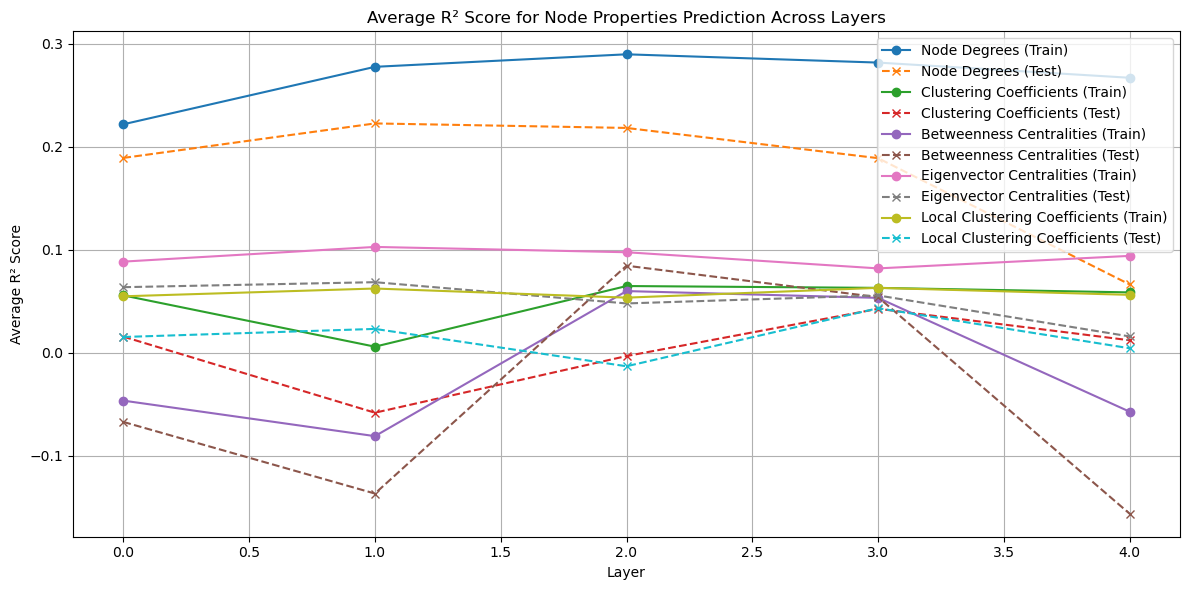

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define Linear Model for probing (diagnostic classifier)
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Prepare the data for probing classifier
def prepare_regression_data(features, properties, property_index, top_n_nodes=10):
    X_layers = [[] for _ in range(len(features[0]))]
    y_layers = [[] for _ in range(len(features[0]))]

    for i, graph_features in enumerate(features):
        top_nodes_indices = get_top_nodes(properties[i][property_index], top_n=top_n_nodes)
        for layer in range(len(graph_features)):
            for node_index in top_nodes_indices:
                X_layers[layer].append(graph_features[layer][node_index])
                y_layers[layer].append(properties[i][property_index][node_index])

    X_layers = [torch.tensor(X) for X in X_layers]
    y_layers = [torch.tensor(y) for y in y_layers]
    
    return X_layers, y_layers

# Train and evaluate the probing classifier for each layer
def train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers):
    r2_scores_train = []
    r2_scores_test = []
    
    for layer in range(len(X_train_layers)):
        X_train = X_train_layers[layer]
        y_train = y_train_layers[layer]
        X_test = X_test_layers[layer]
        y_test = y_test_layers[layer]
        
        model = LinearModel(X_train.shape[1], 1)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)
        
        # Train the model
        model.train()
        for epoch in range(10000):
            optimizer.zero_grad()
            outputs = model(X_train.float())
            loss = criterion(outputs, y_train.float().view(-1, 1))
            loss.backward()
            optimizer.step()
        
        # Evaluate the model
        model.eval()
        with torch.no_grad():
            predictions_train = model(X_train.float()).view(-1)
            predictions_test = model(X_test.float()).view(-1)
            r2_train = r2_score(y_train.float(), predictions_train)
            r2_test = r2_score(y_test.float(), predictions_test)
        r2_scores_train.append(r2_train)
        r2_scores_test.append(r2_test)
    
    return r2_scores_train, r2_scores_test

# Aggregate R² scores across all graphs
def aggregate_r2_scores(features_train, properties_train, features_test, properties_test, property_index):
    X_train_layers, y_train_layers = prepare_regression_data(features_train, properties_train, property_index)
    X_test_layers, y_test_layers = prepare_regression_data(features_test, properties_test, property_index)
    
    r2_scores_train, r2_scores_test = train_and_evaluate_regression(X_train_layers, y_train_layers, X_test_layers, y_test_layers)
    
    return r2_scores_train, r2_scores_test

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers
avg_r2_train_dict = {name: [] for name in property_names}
avg_r2_test_dict = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property: {prop_name}")
    avg_r2_train_dict[prop_name], avg_r2_test_dict[prop_name] = aggregate_r2_scores(train_features, train_node_properties, test_features, test_node_properties, prop_idx)

# Plotting the average R² scores across layers for each property
layers = np.arange(len(avg_r2_train_dict[property_names[0]]))

plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

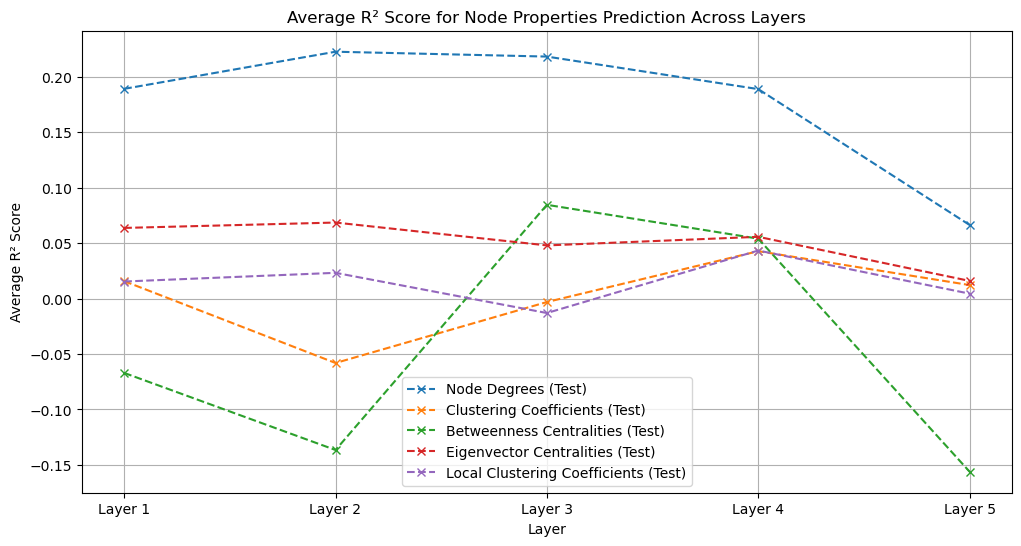

In [ ]:
#plot only test results
plt.figure(figsize=(12, 6))

# Plot for average R² scores
for prop_name in property_names:
    plt.plot(layers, avg_r2_test_dict[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')

plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers')
plt.legend()
#x axis called layer 1, layer 2, etc
plt.xticks(range(len(layers)), [f'Layer {i+1}' for i in layers])           
plt.grid(True)

y=1 and y=0 as two different plots

Processing property for y=0: Node Degrees
Processing property for y=0: Clustering Coefficients
Processing property for y=0: Betweenness Centralities
Processing property for y=0: Eigenvector Centralities
Processing property for y=0: Local Clustering Coefficients
Processing property for y=1: Node Degrees
Processing property for y=1: Clustering Coefficients
Processing property for y=1: Betweenness Centralities
Processing property for y=1: Eigenvector Centralities
Processing property for y=1: Local Clustering Coefficients


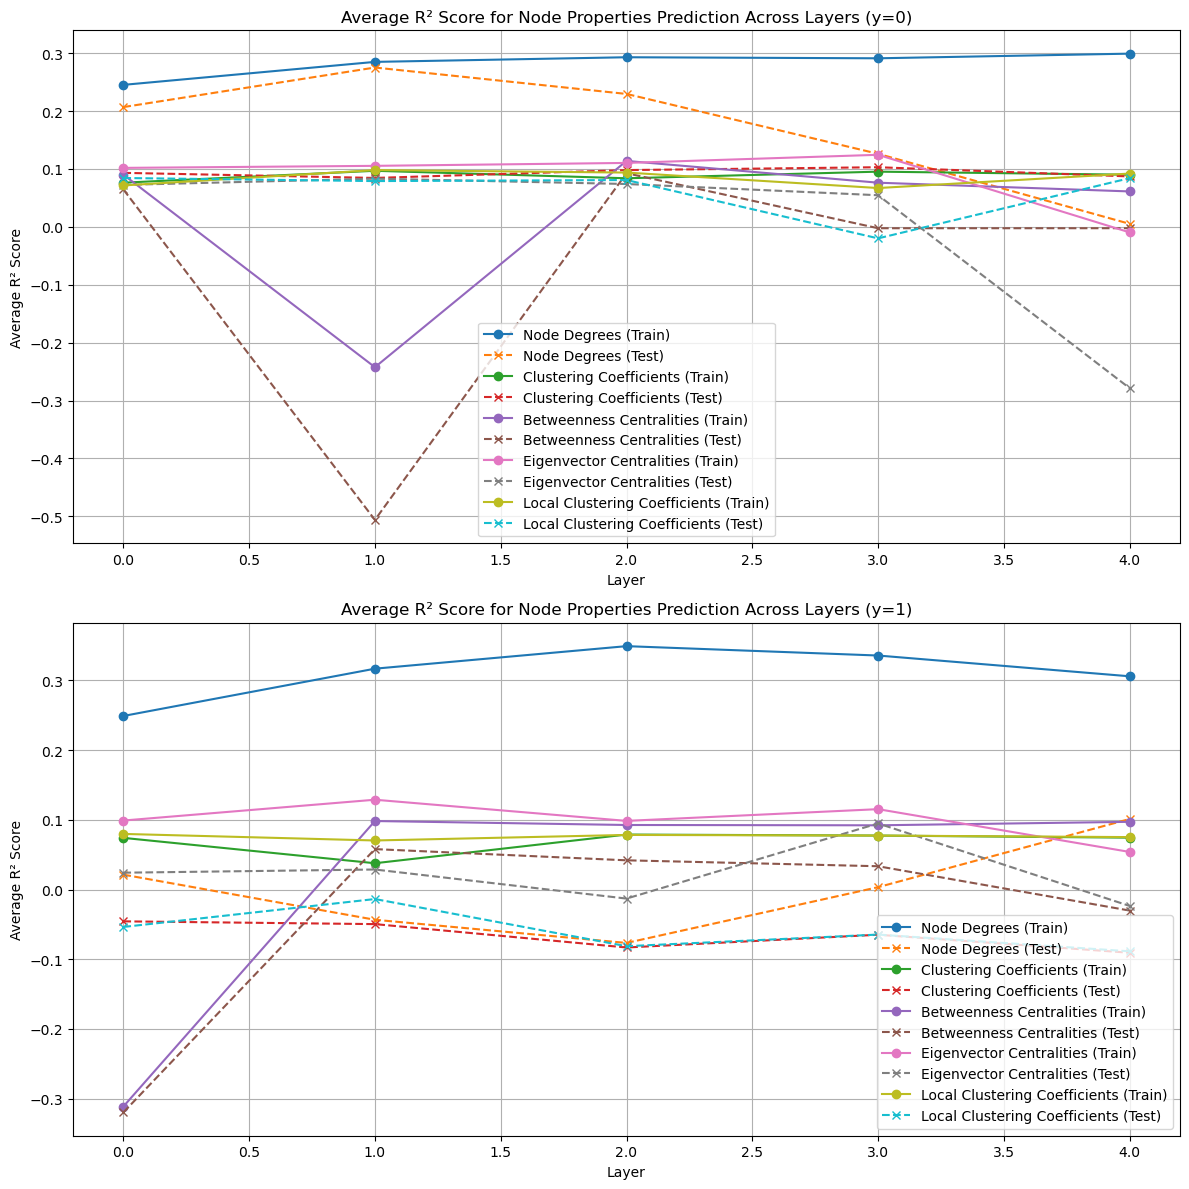

In [ ]:
# Extract labels from the dataset using train_idx_list and test_idx_list
train_idx_list = gnn.train_idx.tolist()
test_idx_list = gnn.test_idx.tolist()

train_labels = [gnn.dataset[i].y.item() for i in train_idx_list]
test_labels = [gnn.dataset[i].y.item() for i in test_idx_list]

# Split the dataset by label y=0 and y=1
def split_by_label(features, properties, labels):
    features_0, properties_0, features_1, properties_1 = [], [], [], []
    
    for i, label in enumerate(labels):
        if label == 0:
            features_0.append(features[i])
            properties_0.append(properties[i])
        else:
            features_1.append(features[i])
            properties_1.append(properties[i])
    
    return features_0, properties_0, features_1, properties_1

# Assuming you have train_features, train_node_properties, test_features, test_node_properties from your GNN
train_features_0, train_node_properties_0, train_features_1, train_node_properties_1 = split_by_label(train_features, train_node_properties, train_labels)
test_features_0, test_node_properties_0, test_features_1, test_node_properties_1 = split_by_label(test_features, test_node_properties, test_labels)

# Properties indices: 0 - node_degrees, 1 - clustering_coeffs, 2 - betweenness_centralities, 3 - eigenvector_centralities, 4 - Local_clustering_coefficients
properties_indices = [0, 1, 2, 3, 4]
property_names = ['Node Degrees', 'Clustering Coefficients', 'Betweenness Centralities', 'Eigenvector Centralities', 'Local Clustering Coefficients']

# Initialize dictionaries to store average R² scores across all layers for y=0 and y=1
avg_r2_train_dict_0 = {name: [] for name in property_names}
avg_r2_test_dict_0 = {name: [] for name in property_names}
avg_r2_train_dict_1 = {name: [] for name in property_names}
avg_r2_test_dict_1 = {name: [] for name in property_names}

# Train and evaluate the probing classifier for each property for y=0
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=0: {prop_name}")
    avg_r2_train_dict_0[prop_name], avg_r2_test_dict_0[prop_name] = aggregate_r2_scores(train_features_0, train_node_properties_0, test_features_0, test_node_properties_0, prop_idx)

# Train and evaluate the probing classifier for each property for y=1
for prop_idx, prop_name in zip(properties_indices, property_names):
    print(f"Processing property for y=1: {prop_name}")
    avg_r2_train_dict_1[prop_name], avg_r2_test_dict_1[prop_name] = aggregate_r2_scores(train_features_1, train_node_properties_1, test_features_1, test_node_properties_1, prop_idx)

# Plotting the average R² scores across layers for each property, separately for y=0 and y=1
layers = np.arange(len(avg_r2_train_dict_0[property_names[0]]))

plt.figure(figsize=(12, 12))

# Plot for y=0
plt.subplot(2, 1, 1)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_0[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_0[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=0)')
plt.legend()
plt.grid(True)

# Plot for y=1
plt.subplot(2, 1, 2)
for prop_name in property_names:
    plt.plot(layers, avg_r2_train_dict_1[prop_name], label=f'{prop_name} (Train)', marker='o')
    plt.plot(layers, avg_r2_test_dict_1[prop_name], label=f'{prop_name} (Test)', linestyle='--', marker='x')
plt.xlabel('Layer')
plt.ylabel('Average R² Score')
plt.title('Average R² Score for Node Properties Prediction Across Layers (y=1)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
